* For v2, I removed rare publishers b/c I had too many features(words) due to weird languages
* (25241, 24391). Too many features. Use PCA.
* For specify max & min number of occurence in vectorization step
* Perform clustering on LSA comps, and not NMF.
    * LSA and NMF are dense linear combinations & Clustering makes sense
    * NMF forces coef to be all positive (lose info) & not fit for clustering
    * LSA is unconstrained & can have negative coef & fit for clustering. Faster than NMF
* Do sentiment analysis
    * Add Vader and TextBlob
* CoreEx

To Do
* Compound Terms
* N-grams
* Custom term list in sentiment analysis
* Topic proportion over time


# For Presentation

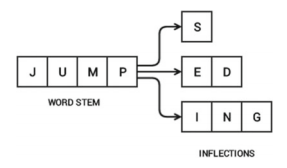

In [1589]:
from IPython.display import Image
Image("stem.png")

In [806]:
pd.concat([df_news_clean,df_sentiment,df_sentiment_textblob],axis=1)[['title_intro','compound','txtblob']].iloc[[24047,24140,24163]]

,title_intro,compound,txtblob,txtblob
24047,Bitwise Claims Facebook’s Libra Propelled Bitc...,-0.7227,0.275,0.275
24140,‘It’s Fantastic Tech’ — Hedge Funds Will Go Bi...,0.7351,0.400,0.400
24163,Bitcoin Price Dives $700 as Simpsons Pattern R...,-0.5267,-0.325,-0.325


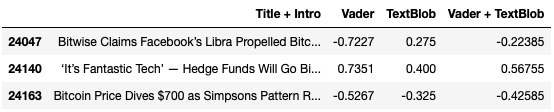

In [811]:
# Magnify positive and negative sentiments while neutralizing somewhat confusing articles
from IPython.display import Image
Image("sentiment.png")
# df_presentation = pd.concat([df_news_clean,df_sentiment,df_sentiment_textblob],axis=1)[['title_intro','compound','txtblob']].iloc[[24047,24140,24163]]
# df_presentation.columns=['Title + Intro','Vader','TextBlob','Vader + TextBlob']
# df_presentation['Vader + TextBlob'] = (df_presentation['Vader']+df_presentation['TextBlob'] )/2
# df_presentation


# Resources

Algorithm
* [PCA with Text](https://github.com/silvernine209/nyc19_ds20/blob/master/curriculum/project-04/svd-pca/PCA_with_text_ex.ipynb)  
* [Guided LDA](https://www.freecodecamp.org/news/how-we-changed-unsupervised-lda-to-semi-supervised-guidedlda-e36a95f3a164/)

Scraping
* [Scrape Reddit Using API](https://towardsdatascience.com/scraping-reddit-data-1c0af3040768)  
* [Google Search Operators](https://ahrefs.com/blog/google-advanced-search-operators/)

API
* [CryptoCompare](https://www.cryptocompare.com)

MongoDB & AWS
* [Allow Python to connect to MongoDB on AWS](https://github.com/silvernine209/nyc19_ds20/blob/master/curriculum/project-04/mongodb-prep/python_to_aws_mongo_setup.md) 
* [MongoDB Exercises](https://github.com/silvernine209/nyc19_ds20/tree/master/curriculum/project-04/mongodb-lab)

Cryptocurrency
* [Bitcoin Transaction Time](https://themoneymongers.com/bitcoin-transaction-time/) ~ 10 min  
* [Crypto Sentiment Analysis Guide #1](https://hackernoon.com/sentiment-analysis-in-cryptocurrency-9abb40005d15)
* [Bitcoin Graph](https://www.coindesk.com/price/bitcoin)

Additional Support
* [NLP Resources](https://github.com/stepthom/text_mining_resources)  
* [Practitioner's NLP Guide](https://towardsdatascience.com/a-practitioners-guide-to-natural-language-processing-part-i-processing-understanding-text-9f4abfd13e72)
* [Metis Project 4 Folder](https://github.com/silvernine209/nyc19_ds20/tree/master/curriculum/project-04)  
* [Udacity Project Customer Segmentation](https://github.com/silvernine209/Udacity-Projects/blob/master/Segment%20Customers/customer_segments.ipynb)

Paper Trading
* [Alpaca](https://app.alpaca.markets/signup)
* [QuantConnect](https://www.quantconnect.com)

Visualization
* [Kim's Matplotlib](https://towardsdatascience.com/simple-ways-to-improve-your-matplotlib-b64eebccfd5)

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words". For example:

**max_df** = 0.50 means "ignore terms that appear in more than 50% of the documents".
**max_df** = 25 means "ignore terms that appear in more than 25 documents".
The default **max_df** is 1.0, which means "ignore terms that appear in more than 100% of the documents". Thus, the default setting does not ignore any terms.

**min_df** is used for removing terms that appear too infrequently. For example:


**min_df** = 0.01 means "ignore terms that appear in less than 1% of the documents".
**min_df** = 5 means "ignore terms that appear in less than 5 documents".
The default **min_df** is 1, which means "ignore terms that appear in less than 1 document". Thus, the default setting does not ignore any terms.


# Import Libraries

In [2]:
# Web Scraping
from bs4 import BeautifulSoup
from lxml import html
import requests


# NLP
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from contractions import CONTRACTION_MAP
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize import word_tokenize
# nltk.download('punkt')
from nltk.tokenize import MWETokenizer # multi-word expression
from nltk.tag import pos_tag
# nltk.download('averaged_perceptron_tagger')
# nltk.download('tagsets')

from gensim import corpora, models, similarities, matutils
import spacy
#python -m spacy download en_core_web_md
import en_core_web_md
import langdetect
nlp = en_core_web_md.load(parse=True, tag=True, entity=True)
tokenizer = ToktokTokenizer()
#nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list+=['crypto','Crypto' 'cryptocurrencie', 'cryptocurrencies', 'Cryptocurrencies', 
                'cryptocurrency','Cryptocurrency', 'btc','Bitcoin','bitcoin','cryptocryptocurrencie']

# stopword_list.remove('no')
# stopword_list.remove('not')
from sklearn.decomposition import NMF
from spacy import displacy
#!pip install vaderSentiment 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Tools
import string
from datetime import date,timedelta,datetime
import unicodedata
import time
import re
import os
import pandas as pd
import numpy as np
import pickle
import random
from tqdm import tqdm, trange
from sklearn import preprocessing

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
#pd.reset_option('^display.', silent=True) #Resets all pandas options

# Modeling
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

/Users/matthewlee/anaconda3/envs/nlp/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


# Functions

#### Helper Functions

In [1322]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
# Load all scraped pickle files and combine it to one dataframe
def combine_pickle_files(folder_name,scrape_start_date): 
    # Location of git folder
    git_folder_location = os.path.abspath(os.path.dirname('bitcoin_trader'))

    # list of pickled files
    pickle_list = os.listdir(git_folder_location+'/'+folder_name+'/')
    if '.DS_Store' in pickle_list:
        pickle_list.remove('.DS_Store')

    # Create a DataFrame to dump all individual DataFrames from scraped data
    with open(folder_name+'/'+pickle_list[0], 'rb') as picklefile: 
        df = pickle.load(picklefile)    
    df_merged = pd.DataFrame(columns=df.keys())

    for file in pickle_list:
        with open(folder_name+'/'+file, 'rb') as picklefile: 
            df = pickle.load(picklefile)
        df_merged = pd.concat([df_merged,df],ignore_index=True,axis=0)
    df_merged = df_merged[df_merged['date']>scrape_start_date].copy() 
    df_merged.dropna(inplace=True)
    df_merged.reset_index(drop=True,inplace=True)
    
    return df_merged


# example) do not -> don't. I would -> I'd
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

# standardized into ASCII characters. example) converting é to e
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text 

# Special characters and symbols
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

# JUMPS, JUMPED, and JUMPING -> JUMP
# Multiple Stemmers : PorterStemmer, LancasterStemmer, SnowballStemmer WordNetLemmatizer
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text


def normalize_corpus(corpus, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

#### Named Entity Recognition (NER)

In [130]:
# Named Entity Recognition (NER)
sentence = "James Smith lives in the United States."
sentence_nlp = nlp(df_news_clean['title_intro'][4])

# print named entities in article
print([(word, word.ent_type_) for word in sentence_nlp if word.ent_type_])

# visualize named entities
displacy.render(sentence_nlp, style='ent', jupyter=True)

[($, 'MONEY'), (120, 'MONEY'), (Billion, 'MONEY')]


#### Compound Term Extraction

In [83]:
# Compoun Term Extraction
my_text = "You all are the greatest students of all time."
mwe_tokenizer = MWETokenizer([('You','all'), ('of', 'all', 'time')])
mwe_tokens = mwe_tokenizer.tokenize(word_tokenize(my_text))
mwe_tokens

['You_all', 'are', 'the', 'greatest', 'students', 'of_all_time', '.']

#### Speech Tagging

In [90]:
# Speech Tagging
my_text = "James Smith lives in the United States."
tokens = pos_tag(word_tokenize(my_text))
print(tokens)
nltk.help.upenn_tagset()

[('James', 'NNP'), ('Smith', 'NNP'), ('lives', 'VBZ'), ('in', 'IN'), ('the', 'DT'), ('United', 'NNP'), ('States', 'NNPS'), ('.', '.')]
$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'an

# Scraping

#### Google News Scraping Function

In [1313]:
# Load webpage's url and load it into soup
def load_soup(url):
    user_agent_list = [
       #Chrome
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.113 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.90 Safari/537.36',
        'Mozilla/5.0 (Windows NT 5.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.90 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.90 Safari/537.36',
        'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.113 Safari/537.36',
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.133 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.133 Safari/537.36',
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.87 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.87 Safari/537.36',
         ]
    

    
    headers = {"User-Agent":random.choice(user_agent_list)}
    response = requests.get(url,headers=headers)
    page = response.text
    soup = BeautifulSoup(page, "lxml")
    return soup,response.status_code

# Scrape bitcoin news data
def scrape_bitcoin_news_google(start_date,end_date,num_per_page):
    # Create "news_data" folder if it's not there
    git_folder_location = os.path.abspath(os.path.dirname('bitcoin_trader'))
    if 'news_data' not in os.listdir(git_folder_location):
        !mkdir 'news_data'

    # already scraped (list from what's already saved in the folder)
    done_list = os.listdir(git_folder_location+'/news_data/')
    if '.DS_Store' in done_list:
        done_list.remove('.DS_Store')
    
    # Using trange to have a progress bar to gauge scraping time
    for i in trange((end_date-start_date).days):    
        # Month, day, and year to be embedded into the url
        M=start_date.month
        D=start_date.day
        Y=start_date.year 
        
        # File name to save pickle file and not to scrape if already scraped
        filename = 'google_news_{}_{}_{}.pkl'.format(M,D,Y)
        
        # if file isn't scraped, go ahead and scrape
        if filename not in done_list:
            # Load data
            base_url = 'https://www.google.com/search?q=cryptocurrency+or+bitcoin&num=40&rlz=1C5CHFA_enUS849US849&biw=573&bih=717&source=lnt&tbs=cdr%3A1%2Ccd_min%3A{}%2F{}%2F{}%2Ccd_max%3A{}%2F{}%2F{}&tbm=nws&num={}'
            url= base_url.format(M,D,Y,M,D,Y,num_per_page)
            soup,response_code = load_soup(url)
            if response_code !=200:
                print("Blacklisted...?")
                print(start_date)
                break
            
            # Empty lists for DataFrame
            publishers = []
            titles = []
            intros = []
            dates = []  

            # Append data to list
            publishers += [publisher.text for publisher in soup.find_all('div', attrs = {'class': 'pDavDe RGRr8e'})]
            titles += [title.text for title in soup.find_all('div', attrs = {'class': 'phYMDf nDgy9d'})]
            intros += [intro.text for intro in soup.find_all('div', attrs = {'class': 'eYN3rb'})]
            dates += [start_date]*len(publishers)
            
            # Turn data into DataFrame
            df = pd.DataFrame({'date':dates,'publisher':publishers,'title':titles,'intro':intros})
            if len(df)<1:
                print("Empty df")
                print(url)
                break
            # Pickle scraped data
            with open('news_data/'+filename, 'wb') as picklefile:
                pickle.dump(df, picklefile)
            # Move onto next day
            start_date+=timedelta(days=1)
            
#             # Randomly sleep any time between 10 and 12 seconds
            time.sleep(random.randint(20,30))
        # If file has been scraped, continue
        else:
            # Move onto next day
            print("{} has already been scraped.".format(filename))
            start_date+=timedelta(days=1)




#### Bitcoin Price Scraping Function

In [1119]:
# Scrape bitcoin news data
def scrape_bitcoin_price(start_date,end_date):
    # Create "price_data" folder if it's not there
    git_folder_location = os.path.abspath(os.path.dirname('bitcoin_trader'))
    if 'price_data' not in os.listdir(git_folder_location):
        !mkdir price_data

        
    # File name to save pickle file and not to scrape if already scraped
    filename = 'bitcoin_price_{}_{}.pkl'.format(start_date,end_date)

    # Load data
    start_date = start_date
    end_date = end_date
    url = 'https://coinmarketcap.com/currencies/bitcoin/historical-data/?start={}&end={}'.format(start_date,end_date)
    soup,response_code = load_soup(url)
    # Check if data was loaded successfully
    if response_code !=200:
        print("Blacklisted...?")

    data = []
    # Find all table elements
    table = soup.find_all('tr', attrs = {'class': 'text-right'})
    for row in table:
        data.append(row.text.split('\n')[1:-1])

    # Create dataframe and convert columns to right data types
    df_price = pd.DataFrame(data,columns=['date','open','high','low','close','volume','market_cap'])
    df_price['date'] = df_price['date'].astype('datetime64[ns]') 
    df_price['open'] = df_price['open'].astype(float) 
    df_price['high'] = df_price['high'].astype(float) 
    df_price['low'] = df_price['low'].astype(float) 
    df_price['close'] = df_price['close'].astype(float) 
    df_price['volume'] = df_price['volume'].str.replace(',', '').astype(float)
    df_price['market_cap'] = df_price['market_cap'].str.replace(',', '').astype(float)
    df_price.sort_values(by=['date'],inplace=True)
    df_price.reset_index(drop=True,inplace=True)        
        
    # Pickle scraped data
    with open('price_data/'+filename, 'wb') as picklefile:
        pickle.dump(df_price, picklefile)
        
    return df_price

#### Scrape Google News Data & Update Exiting Pickled DataFrame & Pickle It

In [1342]:
# Scrape Data by passing in start_date, end_date, num_articles_per_day
# Pages before Google blacklists an IP : 73,65,116,97,71,94,80,79,85,88,84,66,79,76,96,92.
scrape_start_date = date(2019, 8, 12)
#scrape_bitcoin_news_google(scrape_start_date,date(2019, 8, 13),40) #date.today()
scrape_bitcoin_news_google(scrape_start_date,date.today(),40) #date.today()

# Combine individual day pickle files & pickle it
df_news_raw = combine_pickle_files('news_data',scrape_start_date)
df_news_raw.sort_values(by=['date'],inplace=True)
df_news_raw.reset_index(drop=True,inplace=True)

# Combine title & intro
df_news_raw['title_intro'] = df_news_raw['title']+'. '+df_news_raw['intro']

# Remove '\n' from corpus
df_news_raw['title_intro'] = df_news_raw['title_intro'].apply(lambda x : x.replace('\n',''))

# Detect language
df_news_raw['language'] = df_news_raw['title_intro'].copy()
df_news_raw['language'] = df_news_raw['title_intro'].apply(lambda x : langdetect.detect(x))
df_news_raw = df_news_raw[df_news_raw['language']=='en']
df_news_raw.reset_index(drop=True,inplace=True)

# Apply various NLP processes in 'normalize_corpus function'
df_news_raw['title_intro_clean']=normalize_corpus(df_news_raw['title_intro'],stopword_removal=False)

with open('df_news_raw.pkl', 'rb') as picklefile: 
    df_news_raw_original = pickle.load(picklefile) 

df_news_raw = pd.concat([df_news_raw,df_news_raw_original],ignore_index=True,axis=0)
df_news_raw.sort_values(by=['date'],inplace=True)
df_news_raw.drop_duplicates(inplace=True)
df_news_raw.reset_index(drop=True,inplace=True)

with open('df_news_raw.pkl','wb') as picklefile:
    pickle.dump(df_news_raw,picklefile)







  0%|          | 0/12 [00:00<?, ?it/s]





100%|██████████| 12/12 [00:00<00:00, 2621.85it/s]

google_news_8_12_2019.pkl has already been scraped.
google_news_8_13_2019.pkl has already been scraped.
google_news_8_14_2019.pkl has already been scraped.
google_news_8_15_2019.pkl has already been scraped.
google_news_8_16_2019.pkl has already been scraped.
google_news_8_17_2019.pkl has already been scraped.
google_news_8_18_2019.pkl has already been scraped.
google_news_8_19_2019.pkl has already been scraped.
google_news_8_20_2019.pkl has already been scraped.
google_news_8_21_2019.pkl has already been scraped.
google_news_8_22_2019.pkl has already been scraped.
google_news_8_23_2019.pkl has already been scraped.


# Topic Modeling

#### CountVectorizer & NMF

Doc Shape :  (24391, 655)


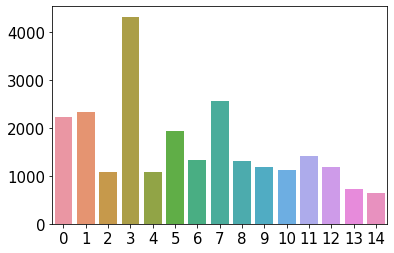

In [420]:
# Load df_news_raw
with open('df_news_clean.pkl', 'rb') as picklefile: 
    df_news_clean = pickle.load(picklefile) 

# Create vectorized matrix with stopword
vectorizer = CountVectorizer(stop_words=stopword_list,max_df=0.10,min_df=0.005)#,max_df=0.30, min_df=0.01)
#vectorizer = CountVectorizer(ngram_range=(1, 2),stop_words=stopword_list,max_df=0.10,min_df=0.005)#,max_df=0.30, min_df=0.01)

doc_word = vectorizer.fit_transform(df_news_clean['title_intro_clean'])

print("Doc Shape : ",doc_word.shape)

# Define NMF model
nmf_model = NMF(n_components=15, init='random', random_state=0)
doc_topics = nmf_model.fit_transform(doc_word)

# Check cluster distribution
doc_cluster = doc_topics.argmax(axis = 1)
sns.barplot(x=pd.Series(doc_cluster).value_counts().keys(),y=pd.Series(doc_cluster).value_counts().values);

In [421]:
# pd.DataFrame(doc_word.toarray(), index=df_news_clean['title_intro_clean'], columns=vectorizer.get_feature_names()).head()

In [422]:
t = nmf_model.components_.argsort(axis=1)[:,-1:-10:-1]
topic_words = [[list(vectorizer.vocabulary_.keys())[e-1] for e in l] for l in t]
#topic_words = [[vectorizer.get_feature_names()[e-1] for e in l] for l in t]
topic_words


[['africa',
  'tuesday',
  'believe',
  'coin',
  'digital',
  'decentralized',
  'criminal',
  'wide',
  'surge'],
 ['earn',
  'despite',
  'wide',
  'secure',
  'hot',
  'april',
  'similar',
  'computer',
  'technology'],
 ['quite',
  'date',
  'city',
  'hope',
  'plunge',
  'invest',
  'street',
  'use',
  'expect'],
 ['move',
  'order',
  'billionaire',
  'core',
  'bank',
  'sector',
  'talk',
  'low',
  'mean'],
 ['increase',
  'much',
  'datum',
  'enter',
  'executive',
  'back',
  'reportedly',
  'high',
  'mark'],
 ['google',
  'second',
  'platform',
  'peak',
  'currently',
  'still',
  'investor',
  'executive',
  'call'],
 ['tether',
  'general',
  'aim',
  'fintech',
  'founder',
  'index',
  'trading',
  'significant',
  'virtual'],
 ['bull',
  'reserve',
  'russia',
  'energy',
  'significant',
  'virtual',
  'index',
  'explain',
  'donald'],
 ['eye',
  'support',
  'hot',
  'promise',
  'long',
  'reveal',
  'best',
  'country',
  'despite'],
 ['mobile',
  'stellar

#### CountVectorizer & LDA

Doc Shape :  (24391, 799)


[(0,
  '0.074*"bank" + 0.032*"payment" + 0.030*"service" + 0.027*"financial" + 0.025*"central" + 0.018*"base" + 0.018*"accept" + 0.018*"system" + 0.016*"announce" + 0.015*"company"'),
 (1,
  '0.071*"ethereum" + 0.050*"cash" + 0.036*"launch" + 0.034*"wallet" + 0.033*"litecoin" + 0.032*"ripple" + 0.026*"platform" + 0.022*"xrp" + 0.020*"eth" + 0.020*"trading"'),
 (2,
  '0.043*"security" + 0.038*"steal" + 0.029*"loss" + 0.025*"hack" + 0.024*"top" + 0.024*"june" + 0.023*"report" + 0.023*"hacker" + 0.022*"post" + 0.021*"attack"'),
 (3,
  '0.104*"digital" + 0.088*"currency" + 0.042*"money" + 0.034*"asset" + 0.034*"ban" + 0.027*"coin" + 0.026*"india" + 0.025*"like" + 0.019*"government" + 0.019*"virtual"'),
 (4,
  '0.067*"buy" + 0.036*"invest" + 0.036*"pay" + 0.034*"sell" + 0.031*"investor" + 0.024*"make" + 0.021*"purchase" + 0.021*"card" + 0.021*"want" + 0.018*"people"'),
 (5,
  '0.063*"fund" + 0.044*"also" + 0.042*"claim" + 0.034*"news" + 0.030*"investor" + 0.028*"report" + 0.027*"read" + 0.0

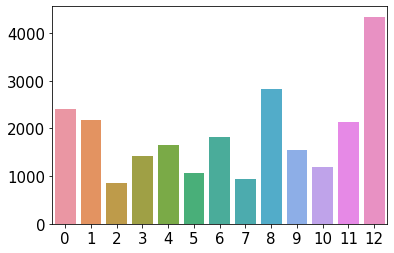

In [446]:
# Create vectorized matrix with stopword
vectorizer = CountVectorizer(stop_words=stopword_list,max_df=0.08,min_df=0.004)
# vectorizer = CountVectorizer(ngram_range=(1, 2),stop_words=stopword_list,max_df=0.20,min_df=0.005)
doc_word = vectorizer.fit_transform(df_news_clean['title_intro_clean'])
print("Doc Shape : ",doc_word.shape)

# Convert sparse matrix of counts to a gensim corpus
corpus = matutils.Sparse2Corpus(doc_word.transpose())

# We need to save a mapping (dict) of row id to word (token) for later use by gensim:
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())

# Create lda model (equivalent to "fit" in sklearn)
lda = models.LdaMulticore(corpus=corpus, num_topics=13, id2word=id2word, passes=7, workers=1)

# Transform the docs from the word space to the topic space (like "transform" in sklearn)
lda_corpus = lda[corpus]

# Store the documents' topic vectors in a list so we can take a peak
lda_docs = [doc for doc in lda_corpus]

# View Topic Distribution
doc_cluster = [sorted(doc,key=lambda row:row[1])[::-1][0][0] for doc in lda_docs]
sns.barplot(x=pd.Series(doc_cluster).value_counts().keys(),y=pd.Series(doc_cluster).value_counts().values);

# # Check out the document vectors in the topic space for the first 5 documents
# lda_docs[:5]
lda.print_topics()

**Libra** - Facebook's currency  
**Binance** - is a global cryptocurrency exchange that provides a platform for trading more than 100 cryptocurrencies. Since early 2018, Binance is considered as the biggest cryptocurrency exchange in the world in terms of trading volume.

#### Tf-idf & NMF

Doc Shape :  (24391, 322)


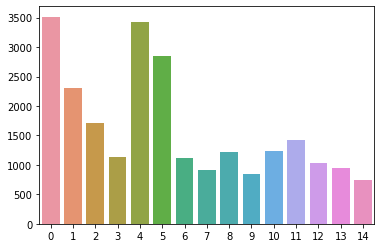

In [479]:
# new TF-IDF Vectorizer
cv_tfidf = TfidfVectorizer(stop_words=stopword_list,max_df=0.1,min_df=0.01)
X_tfidf = cv_tfidf.fit_transform(df_news_clean['title_intro_clean'])


# Define NMF model
nmf_model = NMF(n_components=15, init='random', random_state=0)
doc_topics = nmf_model.fit_transform(X_tfidf)

print("Doc Shape : ",X_tfidf.shape)

# Check cluster distribution
doc_cluster = doc_topics.argmax(axis = 1)
sns.barplot(x=pd.Series(doc_cluster).value_counts().keys(),y=pd.Series(doc_cluster).value_counts().values);

In [480]:
t = nmf_model.components_.argsort(axis=1)[:,-1:-8:-1]
topic_words = [[list(cv_tfidf.vocabulary_.keys())[e-1] for e in l] for l in t]
#topic_words = [[vectorizer.get_feature_names()[e-1] for e in l] for l in t]
topic_words

[['lose', 'account', 'potential', 'show', 'volatility', 'yet', 'people'],
 ['press', 'still', 'network', 'gold', 'percent', 'share', 'cryptocurrencys'],
 ['claim', 'eth', 'facebook', 'run', 'rally', 'tuesday', 'bad'],
 ['build', 'plan', 'tuesday', 'wednesday', 'open', 'four', 'money'],
 ['ban', 'ceo', 'trump', 'last', 'miner', 'steal', 'capital'],
 ['think', 'pay', 'total', 'power', 'run', 'number', 'raise'],
 ['investment', 'alternative', 'come', 'accept', 'medium', 'case', 'use'],
 ['early', 'bch', 'open', 'bad', 'increase', 'rally', 'lead'],
 ['give', 'investor', 'time', 'ago', 'allow', 'open', 'record'],
 ['co', 'launch', 'project', 'loss', 'send', 'top', 'value'],
 ['news', 'week', 'hour', 'crash', 'open', 'platform', 'say'],
 ['try', 'increase', 'thursday', 'call', 'power', 'sec', 'low'],
 ['per', 'ripple', 'form', 'could', 'eth', 'send', 'industry'],
 ['currently', 'allow', 'believe', 'lot', 'gold', 'bull', 'hour'],
 ['popular', 'loss', 'ethereum', 'another', 'need', 'bring', 'w

#### Tf-idf & LDA <- Use This

###### Model

(24391, 799)


[(0,
  '0.057*"mining" + 0.036*"eth" + 0.031*"miner" + 0.030*"ltc" + 0.021*"mine" + 0.017*"tweet" + 0.015*"electricity" + 0.015*"wall" + 0.014*"energy" + 0.014*"street"'),
 (1,
  '0.055*"libra" + 0.036*"tax" + 0.020*"tether" + 0.019*"irs" + 0.016*"court" + 0.015*"authority" + 0.011*"rule" + 0.011*"regulatory" + 0.011*"russia" + 0.011*"study"'),
 (2,
  '0.020*"launch" + 0.018*"platform" + 0.018*"payment" + 0.017*"wallet" + 0.016*"coinbase" + 0.016*"accept" + 0.014*"service" + 0.014*"announce" + 0.013*"user" + 0.012*"base"'),
 (3,
  '0.032*"binance" + 0.028*"usd" + 0.025*"altcoin" + 0.023*"break" + 0.017*"trading" + 0.015*"analysis" + 0.015*"volume" + 0.014*"june" + 0.012*"range" + 0.012*"ethereum"'),
 (4,
  '0.013*"prediction" + 0.012*"attack" + 0.011*"analyst" + 0.010*"towards" + 0.010*"predict" + 0.009*"go" + 0.009*"many" + 0.009*"cryptos" + 0.009*"point" + 0.009*"popular"'),
 (5,
  '0.041*"ban" + 0.021*"china" + 0.018*"scam" + 0.015*"india" + 0.014*"wild" + 0.013*"chinas" + 0.013*"po

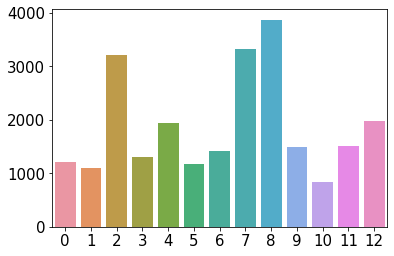

In [442]:
# new TF-IDF Vectorizer
cv_tfidf = TfidfVectorizer(stop_words=stopword_list,max_df=0.08,min_df=0.004)
# cv_tfidf = TfidfVectorizer(stop_words=stopword_list,max_df=0.6,min_df=0.005,ngram_range=(1, 2))
doc_word = cv_tfidf.fit_transform(df_news_clean['title_intro_clean'])

print(doc_word.shape)

# Convert sparse matrix of counts to a gensim corpus
corpus = matutils.Sparse2Corpus(doc_word.transpose())

# We need to save a mapping (dict) of row id to word (token) for later use by gensim:
id2word = dict((v, k) for k, v in cv_tfidf.vocabulary_.items())

# Create lda model (equivalent to "fit" in sklearn)
lda = models.LdaMulticore(corpus=corpus, num_topics=13, id2word=id2word, passes=5, workers=1)

# Transform the docs from the word space to the topic space (like "transform" in sklearn)
lda_corpus = lda[corpus]

# Store the documents' topic vectors in a list so we can take a peak
lda_docs = [doc for doc in lda_corpus]

# View Topic Distribution
doc_cluster = [sorted(doc,key=lambda row:row[1])[::-1][0][0] for doc in lda_docs]
sns.barplot(x=pd.Series(doc_cluster).value_counts().keys(),y=pd.Series(doc_cluster).value_counts().values);

# # Check out the document vectors in the topic space for the first 5 documents
# lda_docs[:5]
lda.print_topics()

# #Save Trained Model
# with open('lda.pkl', 'wb') as picklefile:
#     pickle.dump(lda, picklefile)   

##### Identify Topics

In [673]:
topic_mapping={
                0:'Cryptocurrency Mining',
                1:'Tax Related',
                2:'Technology',
                3:'Binance - Biggest Crypto Trading Platform',
                4:'Market Analysis',
                5:'International - China and India',
                6:'Hackers/Stealing'  ,
                7:'Venezuela and Cryptocurrency', #Venezuela has hyperinflation with national currency. People ruf off to cryptos
                8:'Market',
                9:'Different Cryptocurrencies',
                10:'Satoshi Nakamoto',
                11:'Facebook',
                12:'Regulations'}

##### Update df_news_clean dataframe with classified topics and pickle it

In [667]:
# df_topics = []
# for vec in vec_topics:
#     sorted_x = sorted(vec, key=operator.itemgetter(1))
#     sorted_x.reverse()
#     df_topics.append(topic_mapping[sorted_x[0][0]])
# with open('df_news_clean_topic.pkl','wb') as picklefile:
#     pickle.dump(df_news_clean,picklefile)

In [796]:
list(df_news_clean_topic['topic'].value_counts().keys())

['Regulations',
 'Market',
 'Cryptocurrency Mining',
 'Tax Related',
 'Facebook',
 'Hackers/Stealing',
 'Market Analysis',
 'Different Cryptocurrencies',
 'Binance - Biggest Crypto Trading Platform',
 'Satoshi Nakamoto',
 'International - China and India',
 'Venezuela and Cryptocurrency',
 'Technology']

##### Plot Topic Trends

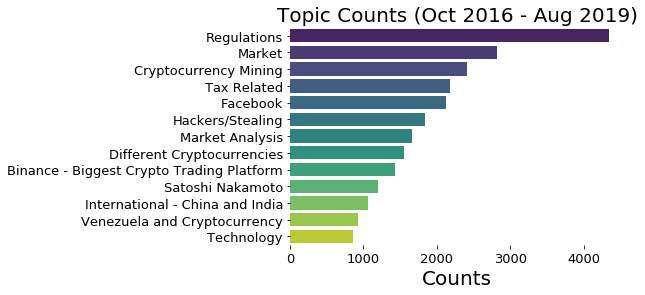

In [793]:


sns.barplot(y=df_news_clean_topic['topic'].value_counts().keys(),
            x=df_news_clean_topic['topic'].value_counts().values,
            palette="viridis")

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)
# Visualize Top 15 Publishers

#plt.axvline(x=930,color='r',linestyle ='-.' )  #vertical line. Linestype : ['-', '--', '-.', ':', '',]

#plt.ylabel('Publishers (n = 1563)')
#plt.yticks(rotation='vertical')
plt.xlabel('Counts')
plt.title('Topic Counts (Oct 2016 - Aug 2019)');

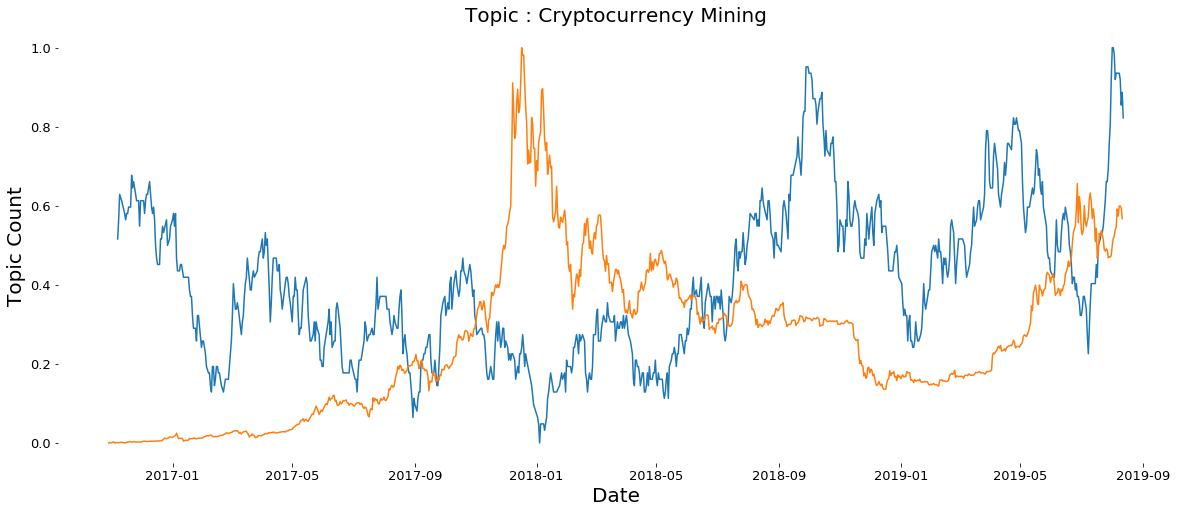

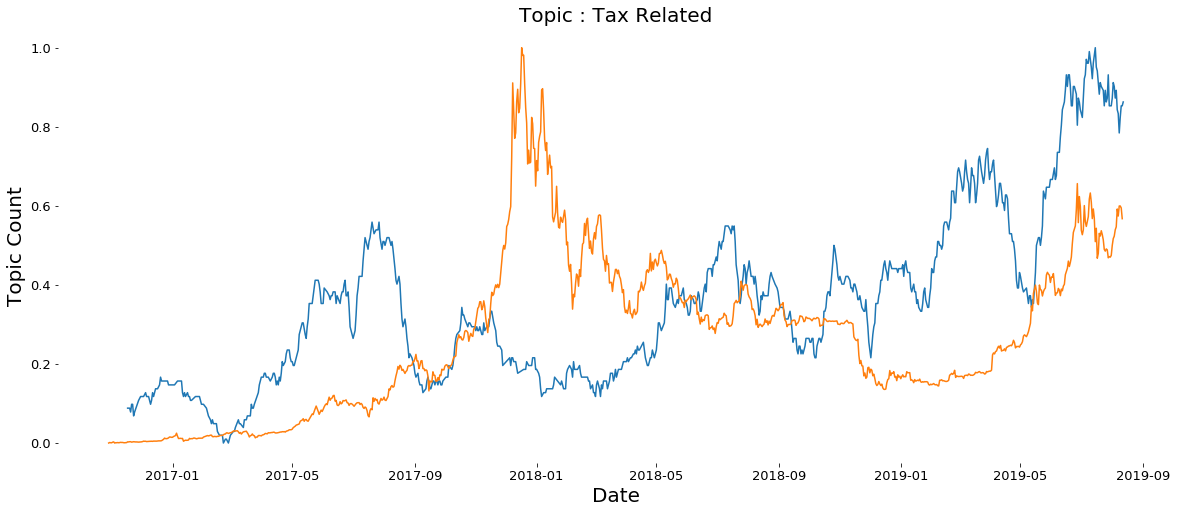

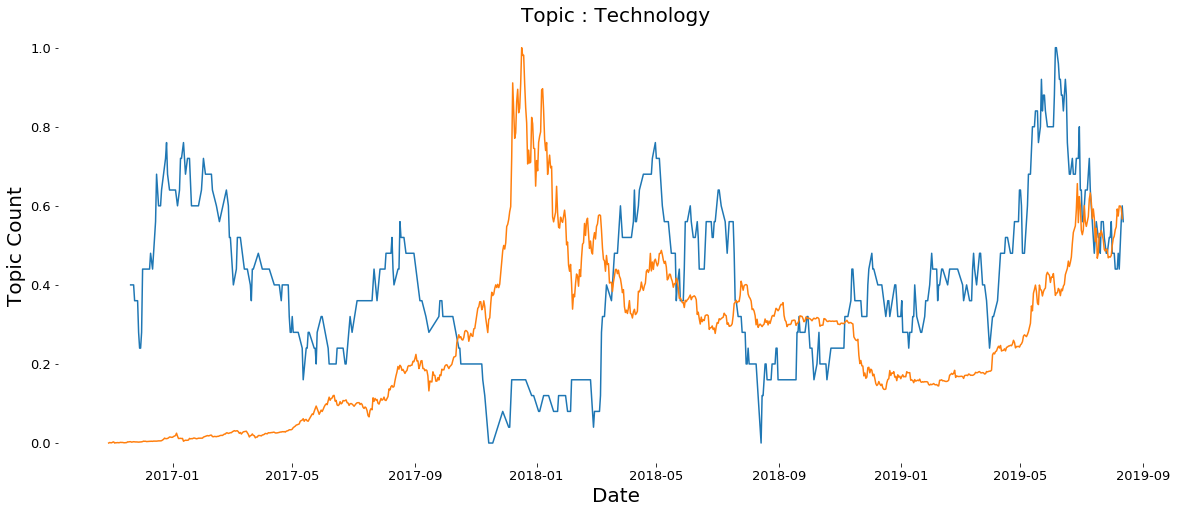

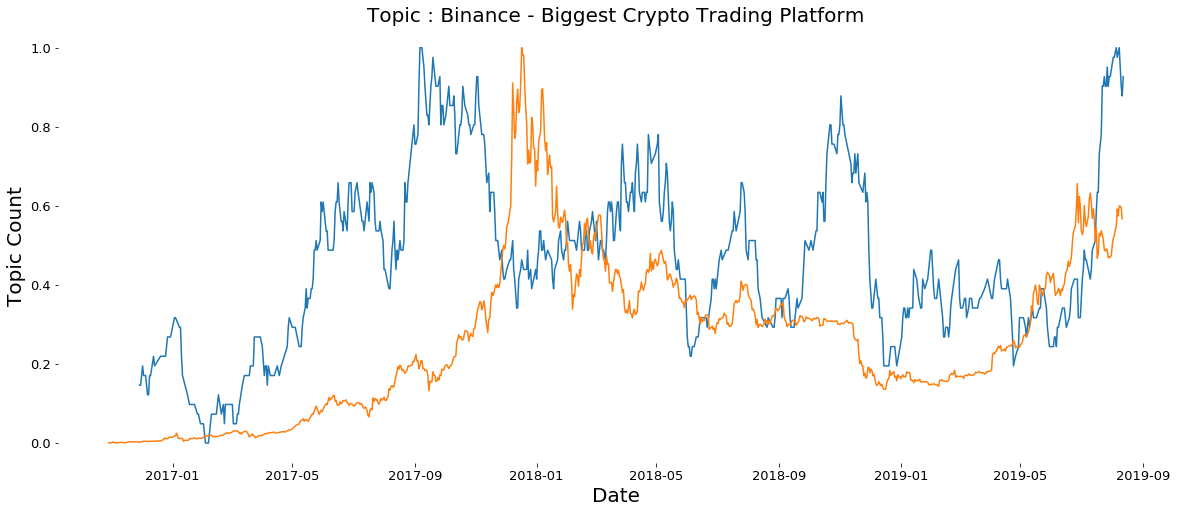

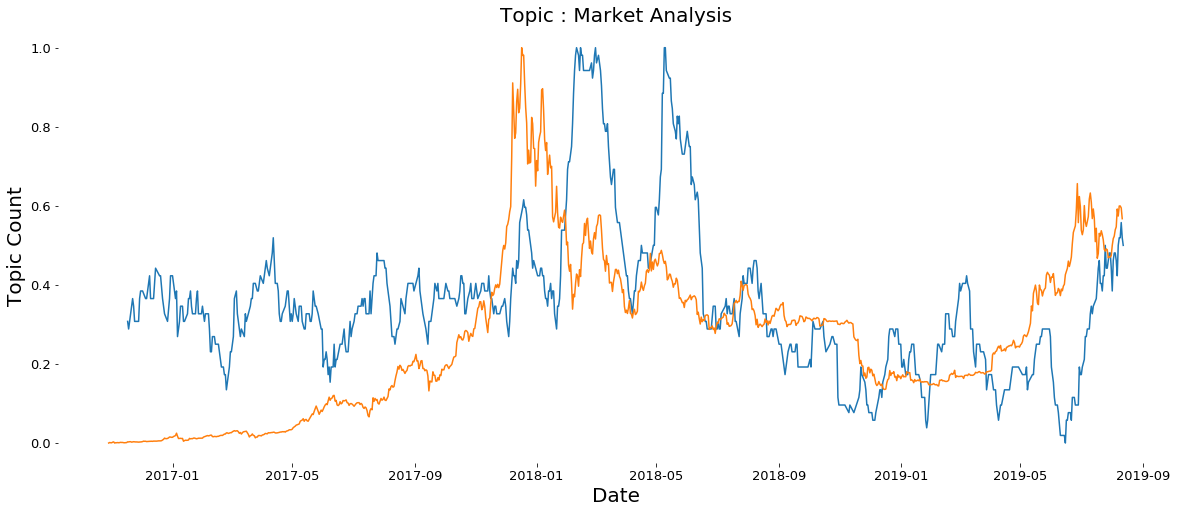

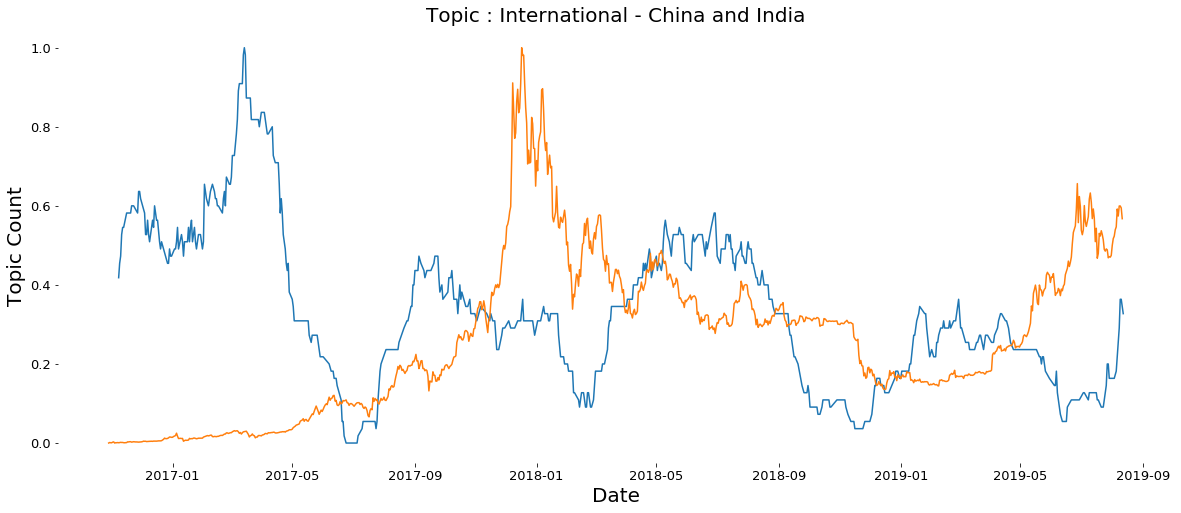

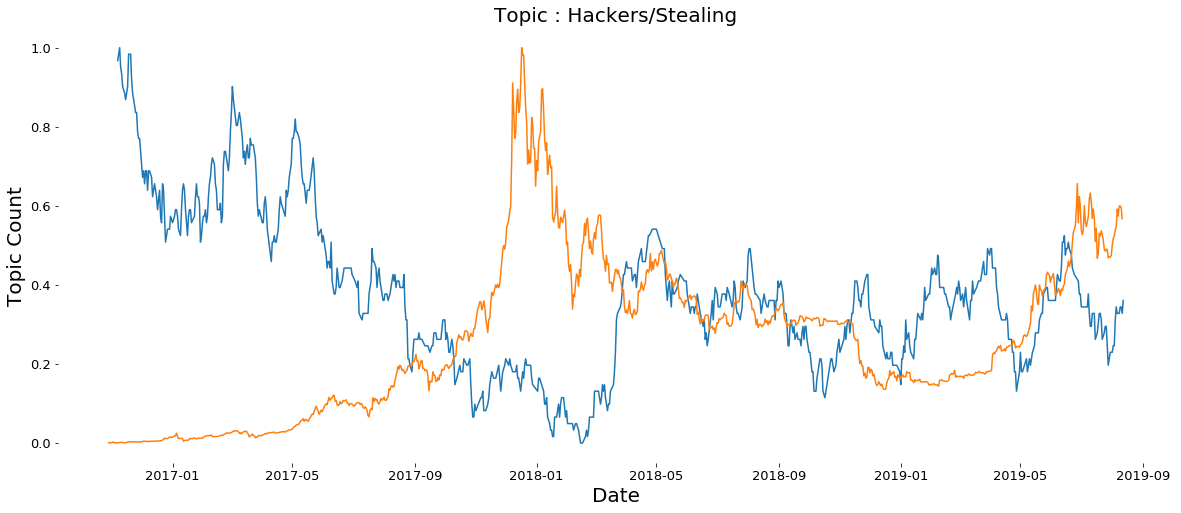

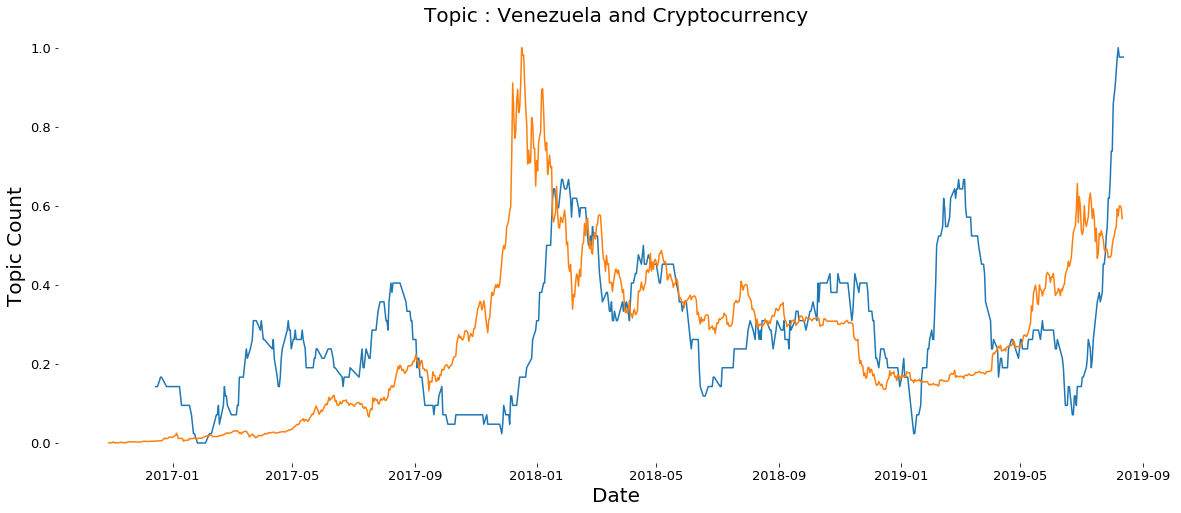

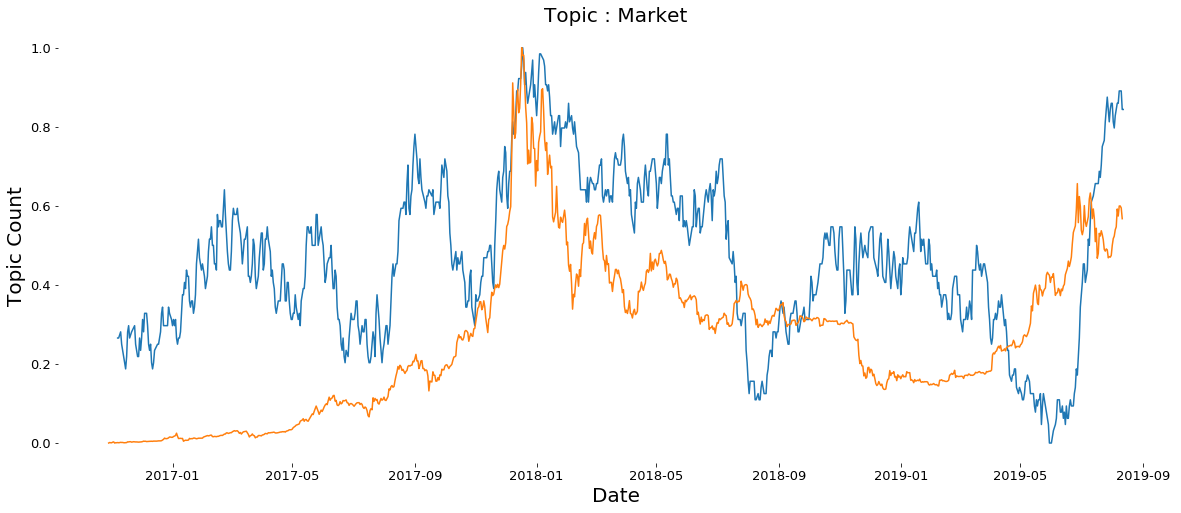

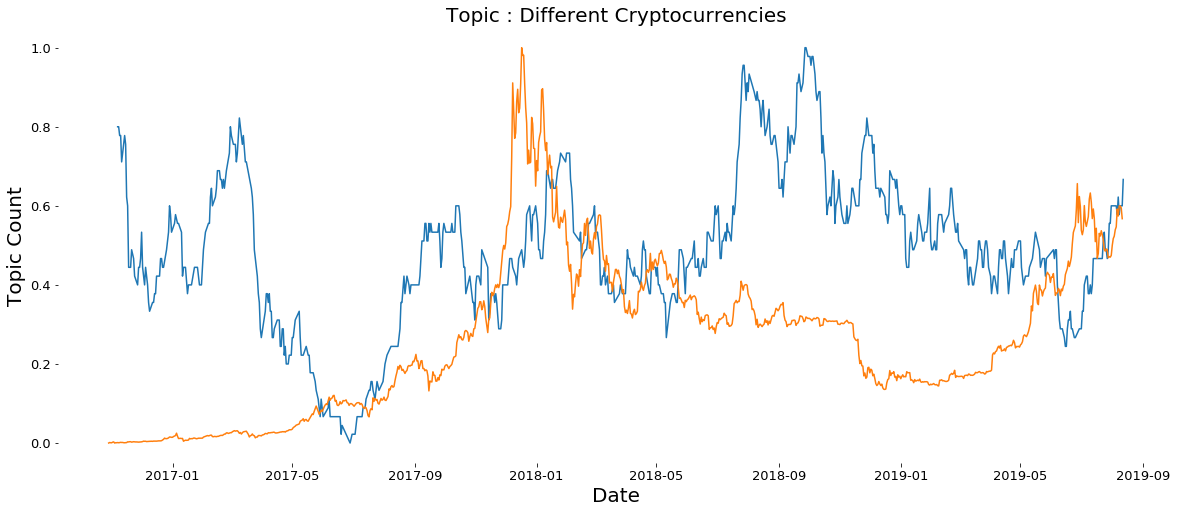

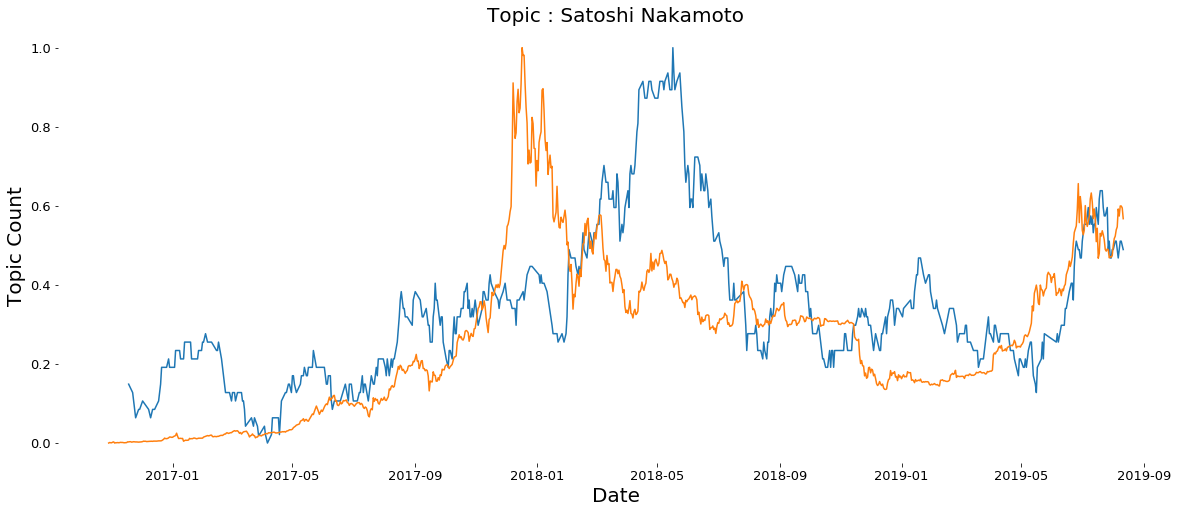

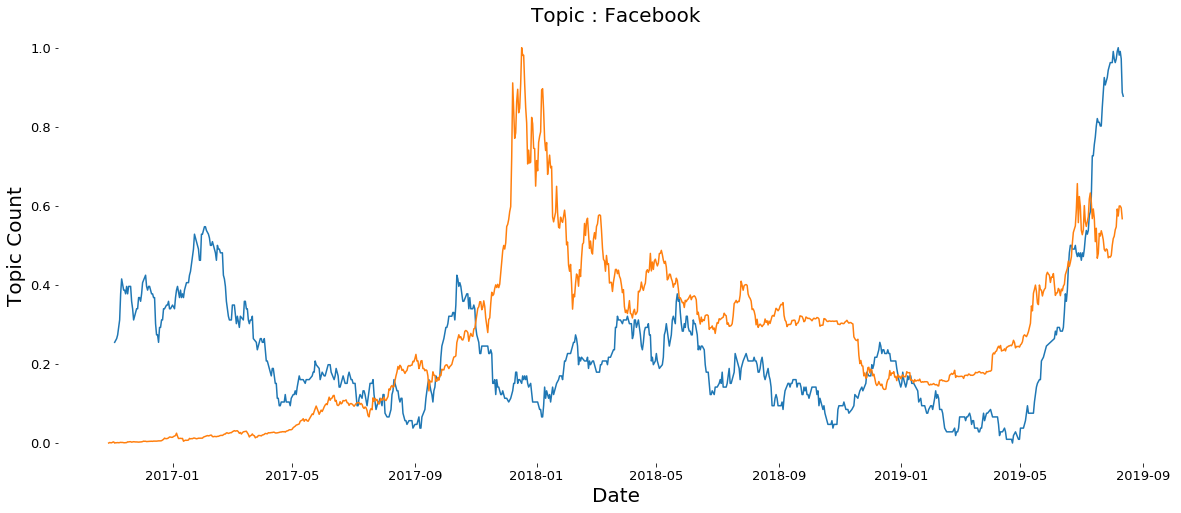

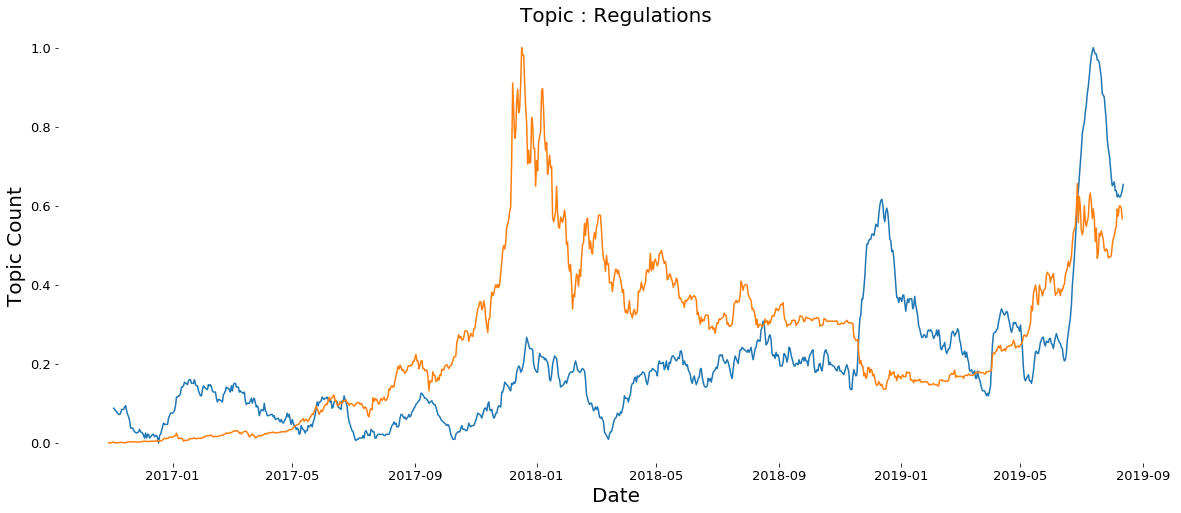

In [778]:
with open('df_news_clean_topic.pkl', 'rb') as picklefile: 
    df_news_clean_topic = pickle.load(picklefile)
    min_max_scaler = preprocessing.MinMaxScaler()
for topic in list(topic_mapping.values()):
    topic_df = df_news_clean_topic[df_news_clean_topic['topic']==topic].groupby(by=['date'],as_index=False).count()
    plt.figure(figsize=(20,8))
    sns.lineplot(x=topic_df['date'],y=min_max_scaler.fit_transform(np.array(topic_df['topic'].rolling(30).mean()).reshape(-1,1)).reshape(-1))
    sns.lineplot(x=df_daily['date'],y=min_max_scaler.fit_transform(df_daily['open'].values.reshape(-1,1)).reshape(-1))


    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)

    #plt.axvline(x=date(2018, 9, 1),color='r',linestyle ='-.' )  #vertical line. Linestype : ['-', '--', '-.', ':', '',]

    plt.xlabel('Date')
    plt.ylabel('Topic Count')
    plt.title('Topic : {}'.format(topic))
    plt.show() 
    


#### CoreEX

In [491]:
#!pip install corextopic
#!pip install networkx
import scipy.sparse as ss

from corextopic import corextopic as ct
from corextopic import vis_topic as vt

/Users/matthewlee/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


2016
- Bitcoin as payment
- Satoshi
- august - hackers attack Bitfinex steal 120 000 bitcoin
- sept - bitcoin atm increase

2017
- April - Japan recognize bitcoin as legal payment
- Dec - South Korea regulate bitcoin trading, potential closure of exchange. Price fall

2018  
- jan - Korea requires Face ID for trading
- jan - FB ban bitcoin advertising
- Feb - price drop a lot
- mar - google&twitter prohibits online ad for crypto
- apr - India’s largest trading platform lost 3 million
- May - Goldman gets involved with bitcoin
- May - justice department investigate manipulators
- June - Korea’s Coinrail loses more that 40 million in tokens after hacking

2019
- mar - Iran, which banned bitcoin before, now accept them 



In [552]:
'''
Use your domain knowledge (use anchors)
Use low anchor strength (2) in order to have as broad a match as possible
____________________________________________________________________________________
Highlight smaller topics that may be otherwise hidden by larger topics (use anchors)
Use high anchor strength (5+) in order to force topics
Likely means that there will be fewer documents matched to the topic
____________________________________________________________________________________
To see how the same word can be used in different topics (use anchors)
Anchor the same word multiple times

'''
# Create vectorized matrix with stopword
vectorizer = CountVectorizer(stop_words=stopword_list,max_df=0.30,min_df=0.001,binary=True)
# vectorizer = CountVectorizer(ngram_range=(1, 2),stop_words=stopword_list,max_df=0.20,min_df=0.005)
doc_word = vectorizer.fit_transform(df_news_clean['title_intro_clean'])
words = list(np.asarray(vectorizer.get_feature_names()))
print("Doc Shape : ",doc_word.shape)

topic_model = ct.Corex(n_hidden=13, words=words, seed=1)
topic_model.fit(doc_word, words=words, docs=df_news_clean['title_intro_clean'],
                anchors=[['mining' ]
                         ,['platform']
                         ,['ico']
                         ,['price']
                         ,['market']
                         ,['hack']
                         ,['regulation']
                         ,['payment']
                        ], anchor_strength=3)

topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

Doc Shape :  (24391, 2340)
0: mining,miner,mine,bitmain,operation,electricity,pool,rig,farm,energy
1: platform,trading,bakkt,content,social,bitmex,etoro,crowdfunde,fiat,ice
2: ico,offering,initial,kong,hong,coin,icos,raise,token,bi
3: price,analysis,prediction,chart,recovery,cryptocurrencys,swing,skyrocket,movement,resistance
4: market,cap,capitalization,billion,bear,total,update,large,dominance,altcoin
5: hack,steal,hacker,korea,south,korean,scheme,scam,million,ransomware
6: regulation,central,government,bank,ban,state,regulator,trump,india,law
7: payment,accept,method,bitpay,merchant,processor,pay,paypal,border,retailer
8: street,wall,founder,ceo,hedge,say,co,fund,buffett,warren
9: blockchain,high,fall,value,year,use,last,hit,drop,rally
10: ethereum,ripple,litecoin,cash,xrp,bch,eth,fork,support,eos
11: exchange,know,people,announce,trade,thing,like,lot,make,many
12: report,get,stock,share,investing,cramer,jim,cryptocurrencie,com,earning


In [547]:
# What are the top documents associated with a topic?

# Let's check out topic : Bank
topic_model.get_top_docs(topic=1, n_docs=2)

[('incent blockchain platform launch decentralized exchange back crowdfund ico for over three year now bitscan have be offer the large bitcoin startup service previously know as the first danish cryptocurrency exchange ',
  0.0),
 ('verge blockchain attack be worth a sober second look the notorious percent attack it be the major fault in cryptocurrency protocol in verge this happen every two hour compare to bitcoin which adjust every ',
  0.0)]

In [548]:
# How do I see which topics CorEx has put each document in?
''' 
Use the .labels attribute to find the topic labels associated with each document that you trained on.
Use the .predict() method to predict labels based on a new doc_word
'''

# Note, instead of using .predict(doc_word), you can also call topic_model.labels
predictions = pd.DataFrame(topic_model.predict(doc_word), columns=['topic'+str(i) for i in range(10)])
predictions.head(3)


,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
0,False,True,True,True,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,True,True


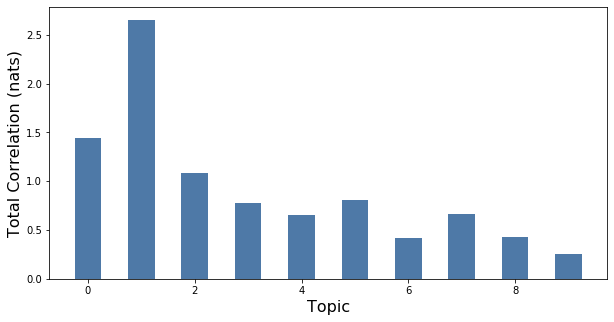

In [549]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

# Sentiment Analysis

#### DataFrame Generation & Pickle Them

In [1387]:
# Load df_news_clean
with open('df_news_raw.pkl', 'rb') as picklefile: 
    df_news_clean = pickle.load(picklefile)

# Replace stock specific terms for sentiment analysis
pos_list = ['rally', 'bounce', 'bullish', 'bull']
neg_list = ['bearish','bear','dip']

# Vader Sentiment Polarity
analyser = SentimentIntensityAnalyzer()
scores_vader =[]
scores_txtblob =[]
for article in df_news_clean['title_intro']:
    for word in pos_list:
        article=article.replace(word,'good')
    for word in neg_list:
        article=article.replace(word,'bad')
    scores_vader.append(analyser.polarity_scores(article))
    scores_txtblob.append({'txtblob':np.round(TextBlob(article).sentiment.polarity,4)})   

df_sentiment = pd.DataFrame(scores_vader) # Convert sentiment scores to dataframe for vader
df_sentiment_textblob = pd.DataFrame(scores_txtblob) # Convert sentiment scores to dataframe for txtblob

# Concat Vader and TextBlob Sentiment DataFrames
df_sentiment = pd.concat([df_sentiment,df_sentiment_textblob],axis=1)

# Concat news dataframe with sentiment dataframe & Create combine two sentiments
df_news_clean = pd.concat([df_news_clean,df_sentiment],axis=1)
df_news_clean['final_sentiment'] = (df_news_clean['compound']+df_news_clean['txtblob'])/2

with open('df_news_sentiment.pkl','wb') as picklefile:
    pickle.dump(df_news_clean,picklefile)

# Load df_news_clean
with open('df_news_sentiment.pkl', 'rb') as picklefile: 
    df_news_sentiment = pickle.load(picklefile)

In [1388]:
# Scrape Bitcoin Price Table 
df_news_sentiment['date'] = df_news_sentiment['date'].astype('datetime64[ns]')
start_date = min(df_news_sentiment['date']).strftime("%Y%m%d")
end_date = max(df_news_sentiment['date']).strftime("%Y%m%d")
df_price = scrape_bitcoin_price(start_date,end_date)

# get daily sentiment score by getting mean of sentiments & concat it with bitcoin price data
df_daily = df_news_sentiment.groupby(['date'], as_index=False).mean().copy()
df_daily = pd.concat([df_daily,df_price[['open', 'high', 'low', 'close', 'volume', 'market_cap']]],axis=1)

# Generate More Features
df_daily['percent_change_volume'] = (df_daily['volume'].shift(1)-df_daily['volume'])/df_daily['volume'].shift(1)
df_daily['percent_change_daily_open'] = (df_daily['open'].shift(1)-df_daily['open'])/df_daily['open'].shift(1)
df_daily['percent_change_wkly_open'] = (df_price['open'].rolling(7).mean().shift(1)-df_price['open'].rolling(7).mean())/df_price['open'].rolling(7).mean().shift(1)
df_daily['percent_change_monthly_open'] = (df_price['open'].rolling(28).mean().shift(1)-df_price['open'].rolling(28).mean())/df_price['open'].rolling(28).mean().shift(1)
df_daily['percent_change_daily_close'] = (df_daily['close'].shift(1)-df_daily['close'])/df_daily['close'].shift(1)
df_daily['percent_change_wkly_close'] = (df_price['close'].rolling(7).mean().shift(1)-df_price['close'].rolling(7).mean())/df_price['close'].rolling(7).mean().shift(1)
df_daily['daily_sentiment_change'] = (df_daily['final_sentiment'].shift(1)-df_daily['final_sentiment'])/df_daily['final_sentiment'].shift(1)
df_daily['wkly_sentiment_change'] = (df_daily['final_sentiment'].rolling(7).mean().shift(1)-df_daily['final_sentiment'].rolling(7).mean())/df_daily['final_sentiment'].rolling(7).mean().shift(1)
df_daily['2wk_sentiment_change'] = (df_daily['final_sentiment'].rolling(14).mean().shift(1)-df_daily['final_sentiment'].rolling(14).mean())/df_daily['final_sentiment'].rolling(14).mean().shift(1)
df_daily['3wk_sentiment_change'] = (df_daily['final_sentiment'].rolling(21).mean().shift(1)-df_daily['final_sentiment'].rolling(21).mean())/df_daily['final_sentiment'].rolling(21).mean().shift(1)
df_daily['4wk_sentiment_change'] = (df_daily['final_sentiment'].rolling(28).mean().shift(1)-df_daily['final_sentiment'].rolling(28).mean())/df_daily['final_sentiment'].rolling(28).mean().shift(1)
df_daily['target_daily'] = df_daily['percent_change_daily_open'].shift(-1)
df_daily.dropna(inplace=True)
df_daily.reset_index(drop=True,inplace=True)

# Pickle df_daily
with open('df_daily.pkl','wb') as picklefile:
    pickle.dump(df_daily,picklefile)

# Load df_news_clean
with open('df_daily.pkl', 'rb') as picklefile: 
    df_daily = pickle.load(picklefile)
    

#### Function to Create Gif

In [905]:
def graph_sentiment_profit_gif(publisher,positive_sentiment_threshold,min_date,iteration):
    SMALL_SIZE = 15
    MEDIUM_SIZE = 20
    BIGGER_SIZE = 40

    if publisher!='all':
        # Generate DataFrame for daily sentiment for each publisher
        asdf_df = df_news_sentiment[df_news_sentiment['date']>min_date]
        #df_news_sentiment = df_news_sentiment[df_news_sentiment['date']>min_date]
        sentiment_by_publisher = asdf_df.groupby(by=['date','publisher'],as_index=False).mean()

        sentiment_publisher_1 = sentiment_by_publisher[sentiment_by_publisher['publisher']==publisher]
        sentiment_publisher_1 = sentiment_publisher_1.merge(df_daily[['date','daily_sentiment_change','target_daily']], left_on='date', right_on='date')

        sentiment_publisher_1['vader_buy_sell'] = sentiment_publisher_1['compound'].apply(lambda x: 1 if x>positive_sentiment_threshold else 0).copy()
        sentiment_publisher_1['vader_profit'] = (sentiment_publisher_1['vader_buy_sell']*100*sentiment_publisher_1['target_daily']).copy()

        sentiment_publisher_1['txtblob_buy_sell'] = sentiment_publisher_1['txtblob'].apply(lambda x: 1 if x>positive_sentiment_threshold else 0).copy()
        sentiment_publisher_1['txtblob_profit'] = (sentiment_publisher_1['txtblob_buy_sell']*100*sentiment_publisher_1['target_daily']).copy()

        sentiment_publisher_1['compound_buy_sell'] = sentiment_publisher_1['final_sentiment'].apply(lambda x: 1 if x>positive_sentiment_threshold else 0).copy()
        sentiment_publisher_1['compound_profit'] = (sentiment_publisher_1['compound_buy_sell']*100*sentiment_publisher_1['target_daily']).copy()

        sentiment_publisher_1['compound_change_buy_sell'] = sentiment_publisher_1['daily_sentiment_change'].apply(lambda x: 1 if x>positive_sentiment_threshold else 0).copy()
        sentiment_publisher_1['compound_change_profit'] = (sentiment_publisher_1['compound_change_buy_sell']*100*sentiment_publisher_1['target_daily']).copy()

        sentiment_publisher_1.dropna(inplace=True)

        vader_profit = list(sentiment_publisher_1['vader_profit'])
        for i in range(1,len(vader_profit)):
            vader_profit[i] = vader_profit[i]+vader_profit[i-1]
        txtblob_profit = list(sentiment_publisher_1['txtblob_profit'])
        for i in range(1,len(txtblob_profit)):
            txtblob_profit[i] = txtblob_profit[i]+txtblob_profit[i-1]
        compound_profit = list(sentiment_publisher_1['compound_profit'])
        for i in range(1,len(compound_profit)):
            compound_profit[i] = compound_profit[i]+compound_profit[i-1]
        compound_change_profit = list(sentiment_publisher_1['compound_change_profit'])
        for i in range(1,len(compound_change_profit)):
            compound_change_profit[i] = compound_change_profit[i]+compound_change_profit[i-1]

        plt.figure(figsize=(20,8))
        sns.lineplot(x=sentiment_publisher_1['date'][:10*iteration],y=vader_profit[:10*iteration])
        sns.lineplot(x=sentiment_publisher_1['date'][:10*iteration],y=txtblob_profit[:10*iteration])
        sns.lineplot(x=sentiment_publisher_1['date'][:10*iteration],y=compound_profit[:10*iteration])
        sns.lineplot(x=sentiment_publisher_1['date'][:10*iteration],y=compound_change_profit[:10*iteration])
        plt.axhline(y=0,color='r',linestyle ='-.' )  #vertical line. Linestype : ['-', '--', '-.', ':', '',]

        plt.ylim(-350,50)
        plt.xlim(min(sentiment_publisher_1['date']), max(sentiment_publisher_1['date']))

        plt.axhline(y=0,color='r',linestyle ='-.' )  #vertical line. Linestype : ['-', '--', '-.', ':', '',]
        plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
        plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
        plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
        plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
        plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
        plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
        plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['left'].set_visible(False)
        plt.gca().spines['bottom'].set_visible(False)

        plt.xlabel('Date')
        plt.ylabel('Profit ($)')
        plt.title('Cumulative Profit ({})'.format(publisher),fontsize=30)
        plt.legend(['Vader','TextBlob','Vader+TextBlob','Vader+TextBlob (*Change in Sentiment)'])




        filename='gif/Cointelegraph/Gapminder_step'+str(iteration)+'.png'
        plt.savefig(filename)
        plt.close()
        
    else:
        # Generate DataFrame for daily sentiment for each publisher
        sentiment_by_publisher = df_news_sentiment.groupby(by=['date'],as_index=False).mean()

        sentiment_publisher_1 = sentiment_by_publisher[sentiment_by_publisher['date']>min_date]
        sentiment_publisher_1 = sentiment_publisher_1.merge(df_daily[['date','daily_sentiment_change','wkly_sentiment_change','2wk_sentiment_change','4wk_sentiment_change','target_daily']], left_on='date', right_on='date')

        sentiment_publisher_1['compound_buy_sell'] = sentiment_publisher_1['final_sentiment'].apply(lambda x: 1 if x>0.236 else 0).copy()
        sentiment_publisher_1['compound_profit'] = (sentiment_publisher_1['compound_buy_sell']*100*sentiment_publisher_1['target_daily']).copy()

        sentiment_publisher_1['compound_change_buy_sell'] = sentiment_publisher_1['daily_sentiment_change'].apply(lambda x: 1 if x>0.219 else 0).copy()
        sentiment_publisher_1['compound_change_profit'] = (sentiment_publisher_1['compound_change_buy_sell']*100*sentiment_publisher_1['target_daily']).copy()

        sentiment_publisher_1['compound_change_buy_sell_wkly'] = sentiment_publisher_1['wkly_sentiment_change'].apply(lambda x: 1 if x>0.331 else 0).copy()
        sentiment_publisher_1['compound_change_profit_wkly'] = (sentiment_publisher_1['compound_change_buy_sell_wkly']*100*sentiment_publisher_1['target_daily']).copy()

        sentiment_publisher_1['compound_change_buy_sell_2wk'] = sentiment_publisher_1['2wk_sentiment_change'].apply(lambda x: 1 if x>0.073 else 0).copy()
        sentiment_publisher_1['compound_change_profit_2wk'] = (sentiment_publisher_1['compound_change_buy_sell_2wk']*100*sentiment_publisher_1['target_daily']).copy()

        sentiment_publisher_1['compound_change_buy_sell_4wk'] = sentiment_publisher_1['4wk_sentiment_change'].apply(lambda x: 1 if x>0.027 else 0).copy()
        sentiment_publisher_1['compound_change_profit_monthly'] = (sentiment_publisher_1['compound_change_buy_sell_4wk']*100*sentiment_publisher_1['target_daily']).copy()

        
        sentiment_publisher_1.dropna(inplace=True)


        compound_profit = list(sentiment_publisher_1['compound_profit'])
        compound_change_profit = list(sentiment_publisher_1['compound_change_profit'])
        compound_change_profit_wkly = list(sentiment_publisher_1['compound_change_profit_wkly'])
        compound_change_profit_2wk = list(sentiment_publisher_1['compound_change_profit_2wk'])
        compound_change_profit_montly = list(sentiment_publisher_1['compound_change_profit_monthly'])
        
        for i in range(1,len(compound_profit)):
            compound_profit[i] = compound_profit[i]+compound_profit[i-1]
        for i in range(1,len(compound_change_profit)):
            compound_change_profit[i] = compound_change_profit[i]+compound_change_profit[i-1]
        for i in range(1,len(compound_change_profit_wkly)):
            compound_change_profit_wkly[i] = compound_change_profit_wkly[i]+compound_change_profit_wkly[i-1]            
        for i in range(1,len(compound_change_profit_2wk)):
            compound_change_profit_2wk[i] = compound_change_profit_2wk[i]+compound_change_profit_2wk[i-1]  
        for i in range(1,len(compound_change_profit_montly)):
            compound_change_profit_montly[i] = compound_change_profit_montly[i]+compound_change_profit_montly[i-1]          

        plt.figure(figsize=(20,8))
        sns.lineplot(x=sentiment_publisher_1['date'][:10*iteration],y=compound_profit[:10*iteration])
        sns.lineplot(x=sentiment_publisher_1['date'][:10*iteration],y=compound_change_profit[:10*iteration])
        sns.lineplot(x=sentiment_publisher_1['date'][:10*iteration],y=compound_change_profit_wkly[:10*iteration])
        sns.lineplot(x=sentiment_publisher_1['date'][:10*iteration],y=compound_change_profit_2wk[:10*iteration])
        sns.lineplot(x=sentiment_publisher_1['date'][:10*iteration],y=compound_change_profit_montly[:10*iteration])
        plt.axhline(y=0,color='r',linestyle ='-.' )  #vertical line. Linestype : ['-', '--', '-.', ':', '',]

        plt.ylim(-150,100)
        
        plt.axhline(y=0,color='r',linestyle ='-.' )  #vertical line. Linestype : ['-', '--', '-.', ':', '',]
        plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
        plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
        plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
        plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
        plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
        plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
        plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['left'].set_visible(False)
        plt.gca().spines['bottom'].set_visible(False)   
        plt.xlim(min(sentiment_publisher_1['date']), max(sentiment_publisher_1['date']))
        plt.xlabel('Date')
        plt.ylabel("Trading Bot's Profit ($)")
        plt.title('Cumulative Profit',fontsize=30)
        plt.legend(['Vader+TextBlob Threshold = 0.236 (*Sentiment - Daily)',
                    'Vader+TextBlob Threshold = 0.219 (*Change in Sentiment - Daily)',
                    'Vader+TextBlob Threshold = 0.331 (*Change in Sentiment - Weekly MA)',
                    'Vader+TextBlob Threshold = 0.073 (*Change in Sentiment - 2 Weeks MA)',
                    'Vader+TextBlob Threshold = 0.027 (*Change in Sentiment - Monthly MA)'],loc='lower left')
     

        
        #plt.xticks(sentiment_publisher_1['date'],rotation='vertical')
        filename='gif/Cointelegraph/Gapminder_step'+str(iteration)+'.png'
        plt.savefig(filename)
        plt.close()


#### Functions for Sentiment EDA

In [971]:
def graph_sentiment_profit(publisher,positive_sentiment_threshold,min_date):
    SMALL_SIZE = 15
    MEDIUM_SIZE = 20
    BIGGER_SIZE = 40

#     plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
#     plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
#     plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
#     plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#     plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#     plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#     plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
#     plt.gca().spines['top'].set_visible(False)
#     plt.gca().spines['right'].set_visible(False)
#     plt.gca().spines['left'].set_visible(False)
#     plt.gca().spines['bottom'].set_visible(False)
    if publisher!='all':
        # Generate DataFrame for daily sentiment for each publisher
        asdf_df = df_news_sentiment[df_news_sentiment['date']>min_date]
        #df_news_sentiment = df_news_sentiment[df_news_sentiment['date']>min_date]
        sentiment_by_publisher = asdf_df.groupby(by=['date','publisher'],as_index=False).mean()

        sentiment_publisher_1 = sentiment_by_publisher[sentiment_by_publisher['publisher']==publisher]
        sentiment_publisher_1 = sentiment_publisher_1.merge(df_daily[['date','daily_sentiment_change','target_daily']], left_on='date', right_on='date')

        sentiment_publisher_1['vader_buy_sell'] = sentiment_publisher_1['compound'].apply(lambda x: 1 if x>positive_sentiment_threshold else 0).copy()
        sentiment_publisher_1['vader_profit'] = (sentiment_publisher_1['vader_buy_sell']*100*sentiment_publisher_1['target_daily']).copy()

        sentiment_publisher_1['txtblob_buy_sell'] = sentiment_publisher_1['txtblob'].apply(lambda x: 1 if x>positive_sentiment_threshold else 0).copy()
        sentiment_publisher_1['txtblob_profit'] = (sentiment_publisher_1['txtblob_buy_sell']*100*sentiment_publisher_1['target_daily']).copy()

        sentiment_publisher_1['compound_buy_sell'] = sentiment_publisher_1['final_sentiment'].apply(lambda x: 1 if x>positive_sentiment_threshold else 0).copy()
        sentiment_publisher_1['compound_profit'] = (sentiment_publisher_1['compound_buy_sell']*100*sentiment_publisher_1['target_daily']).copy()

        sentiment_publisher_1['compound_change_buy_sell'] = sentiment_publisher_1['daily_sentiment_change'].apply(lambda x: 1 if x>positive_sentiment_threshold else 0).copy()
        sentiment_publisher_1['compound_change_profit'] = (sentiment_publisher_1['compound_change_buy_sell']*100*sentiment_publisher_1['target_daily']).copy()

        sentiment_publisher_1.dropna(inplace=True)

#         start_index = len(sentiment_publisher_1)-30
#         end_index = len(sentiment_publisher_1)

#         plt.figure(figsize=(20,8))
#         sns.lineplot(x=sentiment_publisher_1['date'][start_index:end_index],y=sentiment_publisher_1['compound'][start_index:end_index])
#         sns.lineplot(x=sentiment_publisher_1['date'][start_index:end_index],y=sentiment_publisher_1['txtblob'][start_index:end_index])
#         sns.lineplot(x=sentiment_publisher_1['date'][start_index:end_index],y=sentiment_publisher_1['final_sentiment'][start_index:end_index])

#         plt.xlabel('Date')
#         plt.ylabel('Sentiment')
#         plt.title('Daily Sentiment for Bitcoin ({}) - Pos Threshold = {}'.format(publisher,positive_sentiment_threshold))
#         plt.legend(['Vader','TextBlob','Vader+TextBlob'])
#     #     plt.xticks(sentiment_publisher_1['date'][start_index:end_index],rotation=60)
#         plt.grid()
#         plt.show()
    #     print('Vader \n   Mean : {}, Std : {}'.format(np.round(np.mean(sentiment_publisher_1['compound']),3),np.round(np.std(sentiment_publisher_1['compound']),3)))
    #     print('TextBlob \n   Mean : {}, Std : {}'.format(np.round(np.mean(sentiment_publisher_1['txtblob']),3),np.round(np.std(sentiment_publisher_1['txtblob']),3)))
    #     print('Vader&TextBlob \n   Mean : {}, Std : {}'.format(np.round(np.mean(sentiment_publisher_1['final_sentiment']),3),np.round(np.std(sentiment_publisher_1['final_sentiment']),3)))

        vader_profit = list(sentiment_publisher_1['vader_profit'])
        for i in range(1,len(vader_profit)):
            vader_profit[i] = vader_profit[i]+vader_profit[i-1]
        txtblob_profit = list(sentiment_publisher_1['txtblob_profit'])
        for i in range(1,len(txtblob_profit)):
            txtblob_profit[i] = txtblob_profit[i]+txtblob_profit[i-1]
        compound_profit = list(sentiment_publisher_1['compound_profit'])
        for i in range(1,len(compound_profit)):
            compound_profit[i] = compound_profit[i]+compound_profit[i-1]
        compound_change_profit = list(sentiment_publisher_1['compound_change_profit'])
        for i in range(1,len(compound_change_profit)):
            compound_change_profit[i] = compound_change_profit[i]+compound_change_profit[i-1]

        plt.figure(figsize=(20,8))
        sns.lineplot(x=sentiment_publisher_1['date'],y=vader_profit)
        sns.lineplot(x=sentiment_publisher_1['date'],y=txtblob_profit)
        sns.lineplot(x=sentiment_publisher_1['date'],y=compound_profit)
        sns.lineplot(x=sentiment_publisher_1['date'],y=compound_change_profit)
        plt.axhline(y=0,color='r',linestyle ='-.' )  #vertical line. Linestype : ['-', '--', '-.', ':', '',]
        plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
        plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
        plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
        plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
        plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
        plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
        plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['left'].set_visible(False)
        plt.gca().spines['bottom'].set_visible(False)

        plt.xlabel('Date')
        plt.ylabel('Profit ($)')
        plt.title('Cumulative Profit ({})'.format(publisher),fontsize=30)
        plt.legend(['Vader','TextBlob','Vader+TextBlob','Vader+TextBlob (*Change in Sentiment)'])
        #plt.xticks(sentiment_publisher_1['date'],rotation='vertical')
        #plt.grid()
        plt.show()
    else:
        # Generate DataFrame for daily sentiment for each publisher
        sentiment_by_publisher = df_news_sentiment.groupby(by=['date'],as_index=False).mean()

        sentiment_publisher_1 = sentiment_by_publisher[sentiment_by_publisher['date']>min_date]
        sentiment_publisher_1 = sentiment_publisher_1.merge(df_daily[['date','daily_sentiment_change','wkly_sentiment_change','2wk_sentiment_change','4wk_sentiment_change','target_daily']], left_on='date', right_on='date')

        sentiment_publisher_1['compound_buy_sell'] = sentiment_publisher_1['final_sentiment'].apply(lambda x: 1 if x>positive_sentiment_threshold else 0).copy()
        sentiment_publisher_1['compound_profit'] = (sentiment_publisher_1['compound_buy_sell']*100*sentiment_publisher_1['target_daily']).copy()

        sentiment_publisher_1['compound_change_buy_sell'] = sentiment_publisher_1['daily_sentiment_change'].apply(lambda x: 1 if x>positive_sentiment_threshold else 0).copy()
        sentiment_publisher_1['compound_change_profit'] = (sentiment_publisher_1['compound_change_buy_sell']*100*sentiment_publisher_1['target_daily']).copy()

        sentiment_publisher_1['compound_change_buy_sell_wkly'] = sentiment_publisher_1['wkly_sentiment_change'].apply(lambda x: 1 if x>positive_sentiment_threshold else 0).copy()
        sentiment_publisher_1['compound_change_profit_wkly'] = (sentiment_publisher_1['compound_change_buy_sell_wkly']*100*sentiment_publisher_1['target_daily']).copy()

        sentiment_publisher_1['compound_change_buy_sell_2wk'] = sentiment_publisher_1['2wk_sentiment_change'].apply(lambda x: 1 if x>positive_sentiment_threshold else 0).copy()
        sentiment_publisher_1['compound_change_profit_2wk'] = (sentiment_publisher_1['compound_change_buy_sell_2wk']*100*sentiment_publisher_1['target_daily']).copy()

        sentiment_publisher_1['compound_change_buy_sell_4wk'] = sentiment_publisher_1['4wk_sentiment_change'].apply(lambda x: 1 if x>positive_sentiment_threshold else 0).copy()
        sentiment_publisher_1['compound_change_profit_monthly'] = (sentiment_publisher_1['compound_change_buy_sell_4wk']*100*sentiment_publisher_1['target_daily']).copy()

        
        sentiment_publisher_1.dropna(inplace=True)

#         start_index = len(sentiment_publisher_1)-30
#         end_index = len(sentiment_publisher_1)        
        
#         min_max_scaler = preprocessing.MinMaxScaler()

#         plt.figure(figsize=(15,5))
        
#         plt.figure(figsize=(20,8))
#         sns.lineplot(x=df_daily['date'][start_index:end_index],y=min_max_scaler.fit_transform(df_daily['close'][start_index:end_index].values.reshape(-1,1)).reshape(-1))
#         sns.lineplot(x=sentiment_publisher_1['date'][start_index:end_index],y=min_max_scaler.fit_transform(sentiment_publisher_1['final_sentiment'][start_index:end_index].values.reshape(-1,1)).reshape(-1))
# #        sns.lineplot(x=sentiment_publisher_1['date'],y=sentiment_publisher_1['final_sentiment'])


#         plt.xlabel('Date')
#         plt.ylabel('Sentiment')
#         plt.title('Daily Compound Sentiment for Bitcoin')
#         plt.legend(['Bitcoin Close Price','Vader+TextBlob'])
#         plt.grid()
#         plt.show()

        # Create a minimum and maximum processor object
        min_max_scaler = preprocessing.MinMaxScaler()

        plt.figure(figsize=(20,8))
        sns.lineplot(x=df_daily['date'],y=min_max_scaler.fit_transform(df_daily['open'].values.reshape(-1,1)).reshape(-1))
        sns.lineplot(x=df_daily['date'],y=min_max_scaler.fit_transform(df_daily['volume'].values.reshape(-1,1)).reshape(-1))

        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['left'].set_visible(False)
        plt.gca().spines['bottom'].set_visible(False)

        #plt.axvline(x=date(2018, 9, 1),color='r',linestyle ='-.' )  #vertical line. Linestype : ['-', '--', '-.', ':', '',]

        plt.xlabel('Date')
        plt.ylabel('Scaled Range')
        plt.title('Bitcoin Open Price vs Volume',fontsize=30)
        #plt.grid()
        plt.legend(['open','volume'])
        plt.show()   

        compound_profit = list(sentiment_publisher_1['compound_profit'])
        compound_change_profit = list(sentiment_publisher_1['compound_change_profit'])
        compound_change_profit_wkly = list(sentiment_publisher_1['compound_change_profit_wkly'])
        compound_change_profit_2wk = list(sentiment_publisher_1['compound_change_profit_2wk'])
        compound_change_profit_montly = list(sentiment_publisher_1['compound_change_profit_monthly'])
        
        for i in range(1,len(compound_profit)):
            compound_profit[i] = compound_profit[i]+compound_profit[i-1]
        for i in range(1,len(compound_change_profit)):
            compound_change_profit[i] = compound_change_profit[i]+compound_change_profit[i-1]
        for i in range(1,len(compound_change_profit_wkly)):
            compound_change_profit_wkly[i] = compound_change_profit_wkly[i]+compound_change_profit_wkly[i-1]            
        for i in range(1,len(compound_change_profit_2wk)):
            compound_change_profit_2wk[i] = compound_change_profit_2wk[i]+compound_change_profit_2wk[i-1]  
        for i in range(1,len(compound_change_profit_montly)):
            compound_change_profit_montly[i] = compound_change_profit_montly[i]+compound_change_profit_montly[i-1]          

        plt.figure(figsize=(20,8))
        sns.lineplot(x=sentiment_publisher_1['date'],y=compound_profit)
        sns.lineplot(x=sentiment_publisher_1['date'],y=compound_change_profit)
        sns.lineplot(x=sentiment_publisher_1['date'],y=compound_change_profit_wkly)
        sns.lineplot(x=sentiment_publisher_1['date'],y=compound_change_profit_2wk)
        sns.lineplot(x=sentiment_publisher_1['date'],y=compound_change_profit_montly)
        plt.axhline(y=0,color='r',linestyle ='-.' )  #vertical line. Linestype : ['-', '--', '-.', ':', '',]


        
        plt.xlabel('Date')
        plt.ylabel("Trading Bot's Profit ($)")
        plt.title('Cumulative Profit - Pos Threshold = {}'.format(positive_sentiment_threshold))
        plt.legend(['Vader+TextBlob (*Sentiment - Daily)',
                    'Vader+TextBlob (*Change in Sentiment - Daily)',
                    'Vader+TextBlob (*Change in Sentiment - Weekly MA)',
                    'Vader+TextBlob (*Change in Sentiment - 2 Weeks MA)',
                    'Vader+TextBlob (*Change in Sentiment - Monthly MA)'])
        #plt.xticks(sentiment_publisher_1['date'],rotation='vertical')
        #plt.grid()
        plt.show()
        
def best_threshold(min_threshold,max_threshold,step,min_date,max_date):
    SMALL_SIZE = 15
    MEDIUM_SIZE = 20
    BIGGER_SIZE = 40
    
    # Parameters for graphs
    plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    
    # Add all final profit later on to these empty lists
    thresholds,raw_senti,senti_change_daily,senti_change_weekly,senti_change_2wk,senti_change_monthly = [],[],[],[],[],[]
    threshold_list = np.arange(min_threshold,max_threshold,step)
    for i in trange(len(threshold_list)):
        positive_sentiment_threshold = threshold_list[i]

        # Generate DataFrame for daily sentiment for each publisher
        sentiment_by_publisher = df_news_sentiment.groupby(by=['date'],as_index=False).mean()

        # Mask to limit daterange for searching best threshhold
        mask = ((sentiment_by_publisher['date']>min_date)&(sentiment_by_publisher['date']<max_date))
        sentiment_publisher_1 = sentiment_by_publisher[mask]
        sentiment_publisher_1 = sentiment_publisher_1.merge(df_daily[['date','daily_sentiment_change','wkly_sentiment_change','2wk_sentiment_change','4wk_sentiment_change','target_daily']], left_on='date', right_on='date')

        sentiment_publisher_1['compound_buy_sell'] = sentiment_publisher_1['final_sentiment'].apply(lambda x: 1 if x>positive_sentiment_threshold else 0).copy()
        sentiment_publisher_1['compound_profit'] = (sentiment_publisher_1['compound_buy_sell']*100*sentiment_publisher_1['target_daily']).copy()

        sentiment_publisher_1['compound_change_buy_sell'] = sentiment_publisher_1['daily_sentiment_change'].apply(lambda x: 1 if x>positive_sentiment_threshold else 0).copy()
        sentiment_publisher_1['compound_change_profit'] = (sentiment_publisher_1['compound_change_buy_sell']*100*sentiment_publisher_1['target_daily']).copy()

        sentiment_publisher_1['compound_change_buy_sell_wkly'] = sentiment_publisher_1['wkly_sentiment_change'].apply(lambda x: 1 if x>positive_sentiment_threshold else 0).copy()
        sentiment_publisher_1['compound_change_profit_wkly'] = (sentiment_publisher_1['compound_change_buy_sell_wkly']*100*sentiment_publisher_1['target_daily']).copy()

        sentiment_publisher_1['compound_change_buy_sell_2wk'] = sentiment_publisher_1['2wk_sentiment_change'].apply(lambda x: 1 if x>positive_sentiment_threshold else 0).copy()
        sentiment_publisher_1['compound_change_profit_2wk'] = (sentiment_publisher_1['compound_change_buy_sell_2wk']*100*sentiment_publisher_1['target_daily']).copy()

        sentiment_publisher_1['compound_change_buy_sell_4wk'] = sentiment_publisher_1['4wk_sentiment_change'].apply(lambda x: 1 if x>positive_sentiment_threshold else 0).copy()
        sentiment_publisher_1['compound_change_profit_monthly'] = (sentiment_publisher_1['compound_change_buy_sell_4wk']*100*sentiment_publisher_1['target_daily']).copy()


        sentiment_publisher_1.dropna(inplace=True)


        compound_profit = list(sentiment_publisher_1['compound_profit'])
        compound_change_profit = list(sentiment_publisher_1['compound_change_profit'])
        compound_change_profit_wkly = list(sentiment_publisher_1['compound_change_profit_wkly'])
        compound_change_profit_2wk = list(sentiment_publisher_1['compound_change_profit_2wk'])
        compound_change_profit_montly = list(sentiment_publisher_1['compound_change_profit_monthly'])

        for i in range(1,len(compound_profit)):
            compound_profit[i] = compound_profit[i]+compound_profit[i-1]
        for i in range(1,len(compound_change_profit)):
            compound_change_profit[i] = compound_change_profit[i]+compound_change_profit[i-1]
        for i in range(1,len(compound_change_profit_wkly)):
            compound_change_profit_wkly[i] = compound_change_profit_wkly[i]+compound_change_profit_wkly[i-1]            
        for i in range(1,len(compound_change_profit_2wk)):
            compound_change_profit_2wk[i] = compound_change_profit_2wk[i]+compound_change_profit_2wk[i-1]  
        for i in range(1,len(compound_change_profit_montly)):
            compound_change_profit_montly[i] = compound_change_profit_montly[i]+compound_change_profit_montly[i-1] 

        thresholds.append(positive_sentiment_threshold)
        raw_senti.append(compound_profit[-1])
        senti_change_daily.append(compound_change_profit[-1])
        senti_change_weekly.append(compound_change_profit_wkly[-1])
        senti_change_2wk.append(compound_change_profit_2wk[-1])
        senti_change_monthly.append(compound_change_profit_montly[-1])
    return thresholds,raw_senti,senti_change_daily,senti_change_weekly,senti_change_2wk,senti_change_monthly

def threshold_vs_profit(thresholds,model_list):
        
    plt.figure(figsize=(20,8))
    for i in range(len(model_list)):
        sns.lineplot(x=thresholds,y=model_list[i])
       
    plt.xlabel('Thresholds')
    plt.ylabel("Trading Bot's Profit ($)")
    plt.title('Cumulative Profit Over Various Positive Sentiment Thresholds',fontsize=30)
    plt.legend(['Vader+TextBlob (*Sentiment - Daily)',
                'Vader+TextBlob (*Change in Sentiment - Daily)',
                'Vader+TextBlob (*Change in Sentiment - Weekly MA)',
                'Vader+TextBlob (*Change in Sentiment - 2 Weeks MA)',
                'Vader+TextBlob (*Change in Sentiment - Monthly MA)'])
    plt.axhline(y=0,color='r',linestyle ='-.' )  #vertical line. Linestype : ['-', '--', '-.', ':', '',] 
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)  
    #plt.xticks(sentiment_publisher_1['date'],rotation='vertical')
    #plt.grid()
    plt.show()

#### EDA Using Sentiments

##### Sentiment vs Bitcoin Price Verification

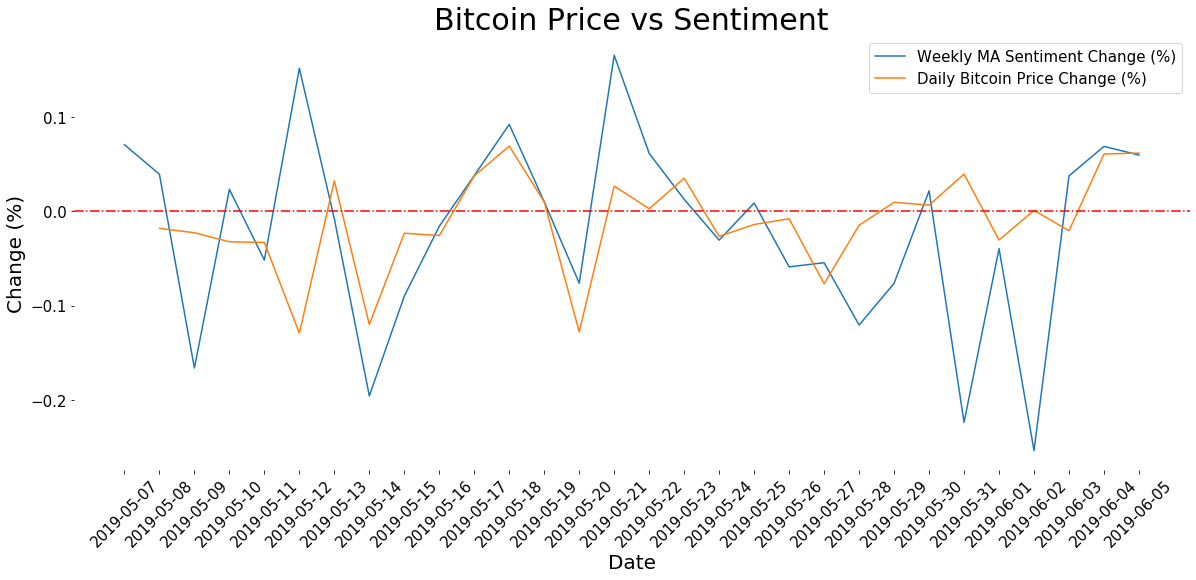

In [924]:
start_index = 920 #index of row where you want your start date to be
end_index = 950 #index of row where you want your start date to be

plt.figure(figsize=(20,8))
#sns.lineplot(x=df_daily['date'][start_index:end_index],y=df_daily['daily_sentiment_change'][start_index:end_index])
sns.lineplot(x=df_daily['date'][start_index:end_index],y=df_daily['wkly_sentiment_change'][start_index:end_index])
#sns.lineplot(x=df_daily['date'][start_index:end_index],y=df_daily['2wk_sentiment_change'][start_index:end_index])
sns.lineplot(x=df_daily['date'][start_index+1:end_index+1],y=df_daily['percent_change_daily_open'][start_index:end_index])

plt.xlabel('Date')
plt.ylabel('Change (%)')
plt.title('Bitcoin Price vs Sentiment',fontsize=30)
plt.legend(['Weekly MA Sentiment Change (%)','Daily Bitcoin Price Change (%)'])
plt.xticks(df_daily['date'][start_index:end_index],rotation=45)
plt.axhline(y=0,color='r',linestyle ='-.' )  #vertical line. Linestype : ['-', '--', '-.', ':', '',] 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False) 

##### Sentiment Differences

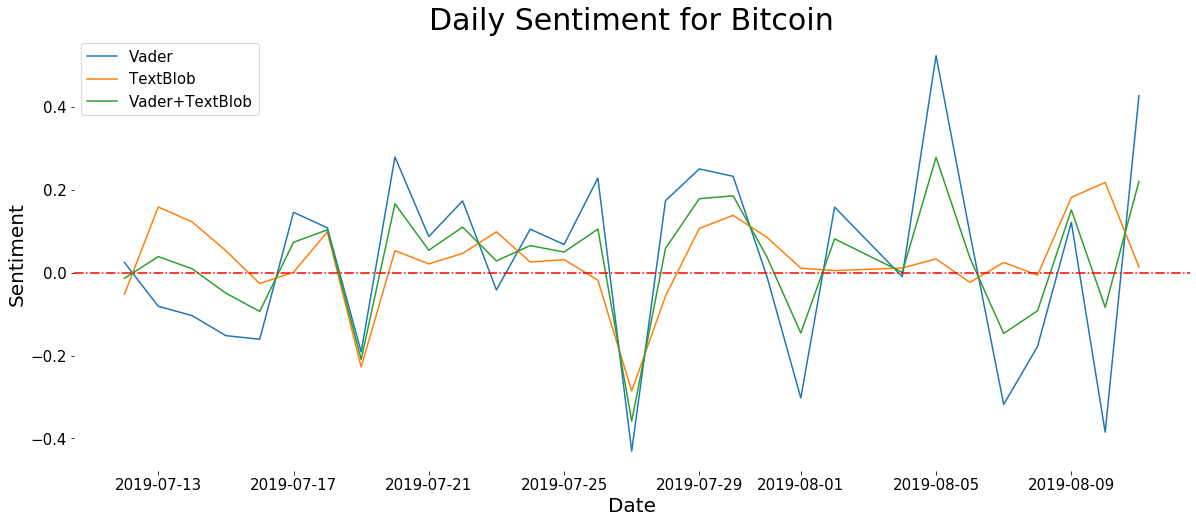

In [923]:
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 40
positive_sentiment_threshold=0

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
publisher = top_5_publishers[0]
# Generate DataFrame for daily sentiment for each publisher
sentiment_by_publisher = df_news_sentiment.groupby(by=['date','publisher'],as_index=False).mean()

sentiment_publisher_1 = sentiment_by_publisher[sentiment_by_publisher['publisher']==publisher]
sentiment_publisher_1 = sentiment_publisher_1.merge(df_daily[['date','daily_sentiment_change','target_daily']], left_on='date', right_on='date')

sentiment_publisher_1['vader_buy_sell'] = sentiment_publisher_1['compound'].apply(lambda x: 1 if x>positive_sentiment_threshold else 0).copy()
sentiment_publisher_1['vader_profit'] = (sentiment_publisher_1['vader_buy_sell']*100*sentiment_publisher_1['target_daily']).copy()

sentiment_publisher_1['txtblob_buy_sell'] = sentiment_publisher_1['txtblob'].apply(lambda x: 1 if x>positive_sentiment_threshold else 0).copy()
sentiment_publisher_1['txtblob_profit'] = (sentiment_publisher_1['txtblob_buy_sell']*100*sentiment_publisher_1['target_daily']).copy()

sentiment_publisher_1['compound_buy_sell'] = sentiment_publisher_1['final_sentiment'].apply(lambda x: 1 if x>positive_sentiment_threshold else 0).copy()
sentiment_publisher_1['compound_profit'] = (sentiment_publisher_1['compound_buy_sell']*100*sentiment_publisher_1['target_daily']).copy()

sentiment_publisher_1['compound_change_buy_sell'] = sentiment_publisher_1['daily_sentiment_change'].apply(lambda x: 1 if x>positive_sentiment_threshold else 0).copy()
sentiment_publisher_1['compound_change_profit'] = (sentiment_publisher_1['compound_change_buy_sell']*100*sentiment_publisher_1['target_daily']).copy()

sentiment_publisher_1.dropna(inplace=True)

start_index = len(sentiment_publisher_1)-30
end_index = len(sentiment_publisher_1)

plt.figure(figsize=(20,8))
sns.lineplot(x=sentiment_publisher_1['date'][start_index:end_index],y=sentiment_publisher_1['compound'][start_index:end_index])
sns.lineplot(x=sentiment_publisher_1['date'][start_index:end_index],y=sentiment_publisher_1['txtblob'][start_index:end_index])
sns.lineplot(x=sentiment_publisher_1['date'][start_index:end_index],y=sentiment_publisher_1['final_sentiment'][start_index:end_index])

plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.title('Daily Sentiment for Bitcoin',fontsize=30)
plt.legend(['Vader','TextBlob','Vader+TextBlob'])
#     plt.xticks(sentiment_publisher_1['date'][start_index:end_index],rotation=60)
plt.axhline(y=0,color='r',linestyle ='-.' )  #vertical line. Linestype : ['-', '--', '-.', ':', '',] 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False) 
#plt.grid()
plt.show()

##### Article Selection

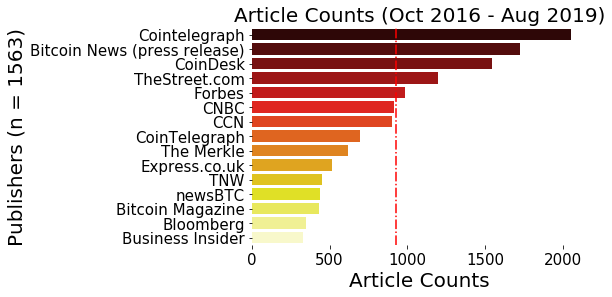

In [773]:
sns.barplot(y=df_news_sentiment['publisher'].value_counts()[0:15].keys(),
            x=df_news_sentiment['publisher'].value_counts()[0:15].values,
            palette="hot")

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)
# Visualize Top 15 Publishers

plt.axvline(x=930,color='r',linestyle ='-.' )  #vertical line. Linestype : ['-', '--', '-.', ':', '',]

plt.ylabel('Publishers (n = 1563)')
#plt.yticks(rotation='vertical')
plt.xlabel('Article Counts')
plt.title('Article Counts (Oct 2016 - Aug 2019)');

# Obtain top 5 publisher names
top_5_publishers = list(df_news_sentiment['publisher'].value_counts()[0:5].index)

##### Profit Graphs

In [975]:
# GIF images generation for each publisher
publisher = top_5_publishers[4]
length = len([sentiment_by_publisher['publisher']==publisher])
for i in trange(int(np.sum(sentiment_by_publisher['publisher']==publisher)/10)):
    graph_sentiment_profit_gif(publisher,0,date(2018,8,20),i)

# # GIF images generation with cumulative sentiments
# length = len(df_news_sentiment.groupby(by=['date'],as_index=False).mean())
# for i in trange(int(length/10)):
#     graph_sentiment_profit_gif('all',0,date(2018,3,20),i)




  0%|          | 0/57 [00:00<?, ?it/s]


  2%|▏         | 1/57 [00:00<00:14,  3.88it/s]


  4%|▎         | 2/57 [00:00<00:14,  3.72it/s]


  5%|▌         | 3/57 [00:00<00:17,  3.17it/s]


  7%|▋         | 4/57 [00:01<00:16,  3.16it/s]


  9%|▉         | 5/57 [00:01<00:16,  3.22it/s]


 11%|█         | 6/57 [00:01<00:16,  3.10it/s]


 12%|█▏        | 7/57 [00:02<00:16,  3.10it/s]


 14%|█▍        | 8/57 [00:02<00:15,  3.12it/s]


 16%|█▌        | 9/57 [00:02<00:16,  2.92it/s]


 18%|█▊        | 10/57 [00:03<00:15,  2.98it/s]


 19%|█▉        | 11/57 [00:03<00:15,  3.02it/s]


 21%|██        | 12/57 [00:03<00:15,  2.93it/s]


 23%|██▎       | 13/57 [00:04<00:14,  2.94it/s]


 25%|██▍       | 14/57 [00:04<00:17,  2.47it/s]


 26%|██▋       | 15/57 [00:05<00:18,  2.23it/s]


 28%|██▊       | 16/57 [00:05<00:17,  2.33it/s]


 30%|██▉       | 17/57 [00:06<00:16,  2.36it/s]


 32%|███▏      | 18/57 [00:06<00:20,  1.93it/s]


 33%|███▎      | 19/57 [00:07<00:20,  1.88it/s]


 35%|███▌      

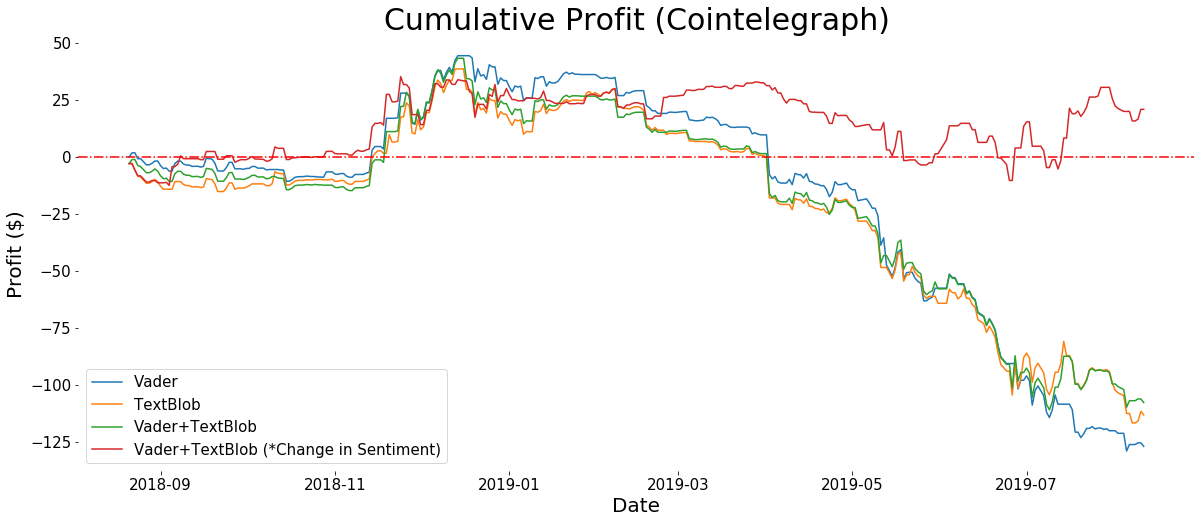

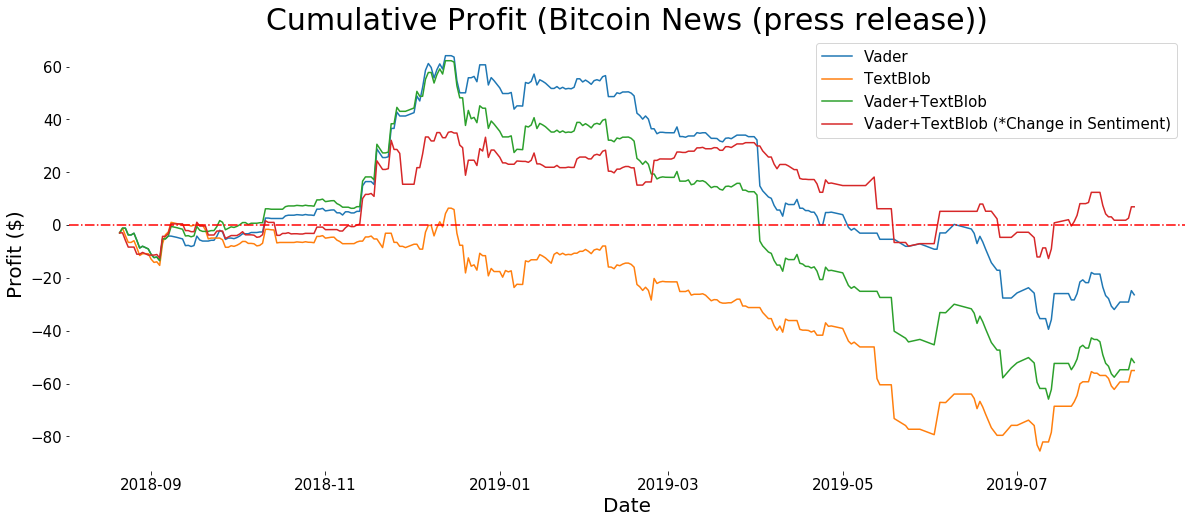

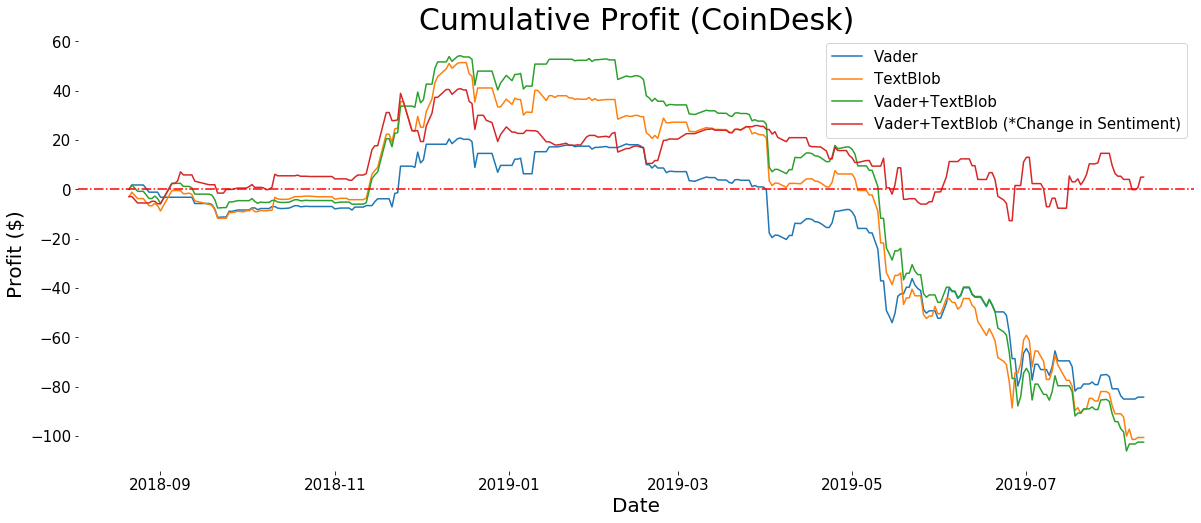

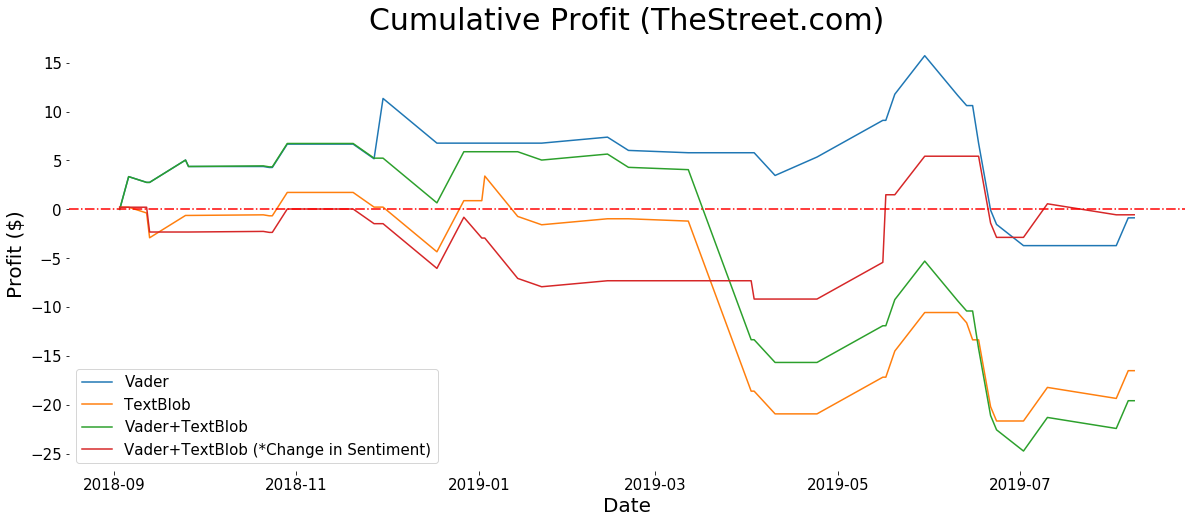

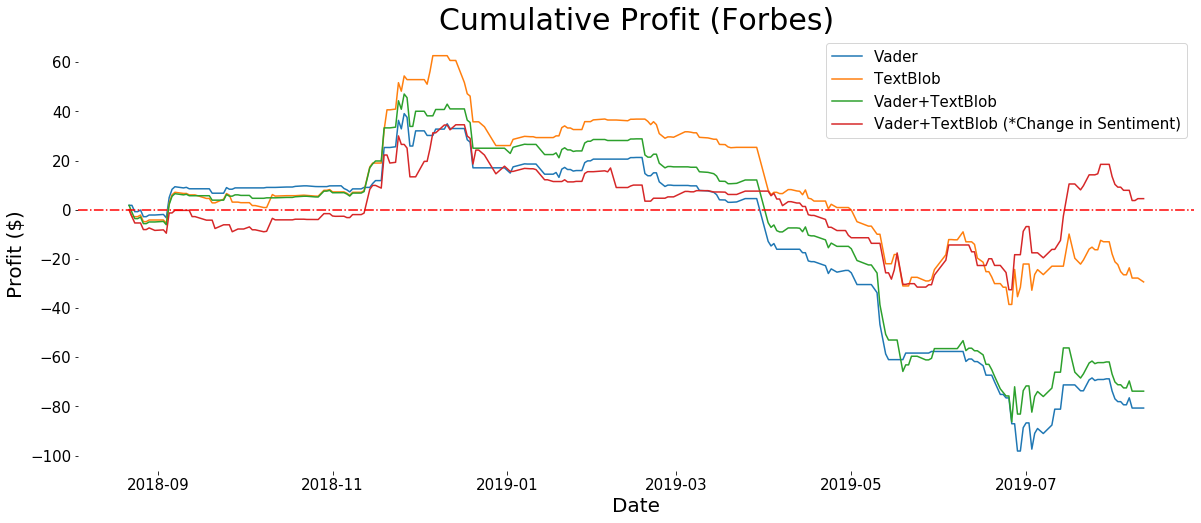

In [974]:
for publisher in top_5_publishers:
    graph_sentiment_profit(publisher,0,date(2018,8,20))

Almost always using combination of Vader+TextBlob with using change in sentiment performed better than using raw sentiment scores

Text(0.5, 1.0, 'Sentiment Change History')

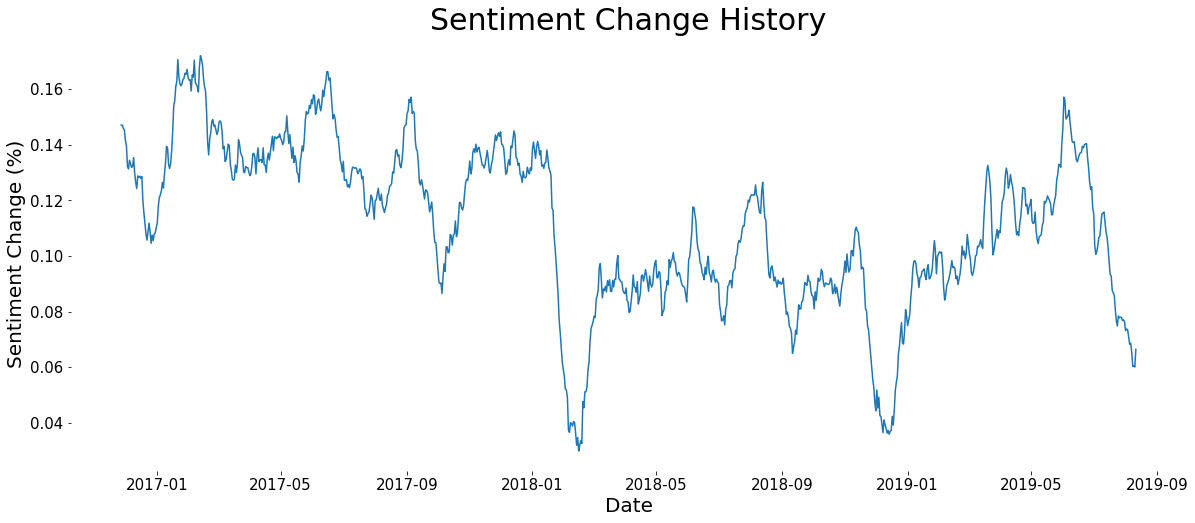

In [973]:
plt.figure(figsize=(20,8))
sns.lineplot(x=df_daily['date'],y=df_daily['final_sentiment'].rolling(30).mean())
# sns.lineplot(x=df_daily['date'],y=df_daily['wkly_sentiment_change'])
# sns.lineplot(x=df_daily['date'],y=df_daily['2wk_sentiment_change'])

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('Date')
plt.ylabel('Sentiment Change (%)')
plt.title('Sentiment Change History',fontsize=30)
# plt.legend(['Daily Sentiment Change (%)','Weekly MA Sentiment Change (%)','Daily Bitcoin Price Change (%)'])
#plt.grid()

/Users/matthewlee/anaconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:101: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.


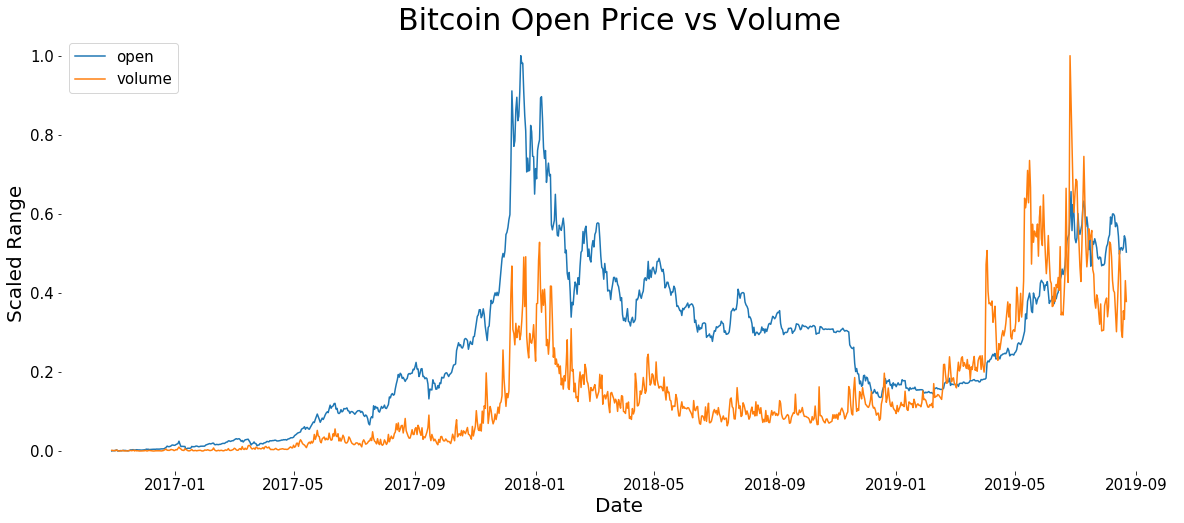

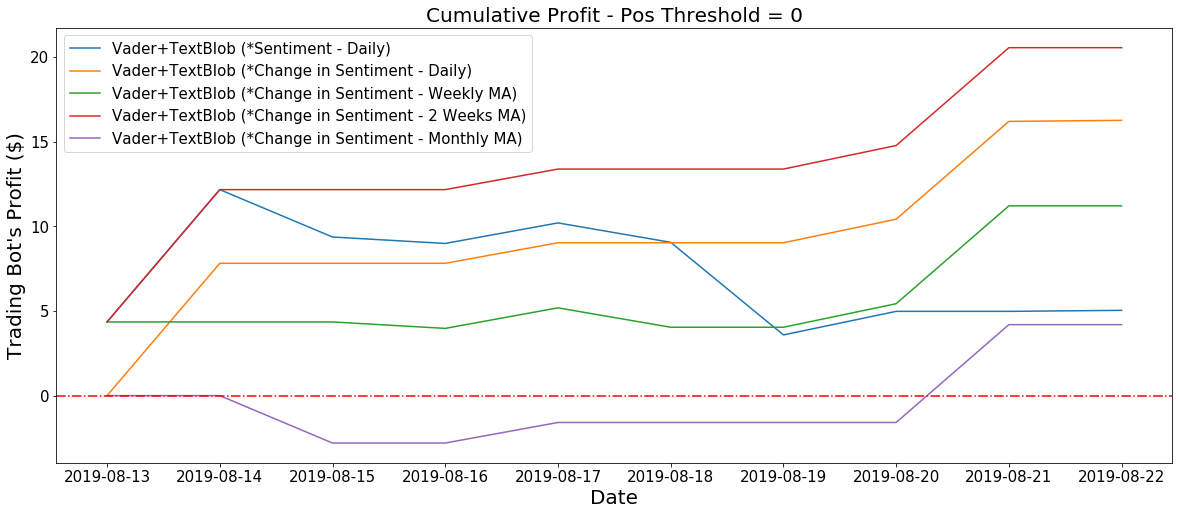

In [1391]:
graph_sentiment_profit('all',0,date(2019, 8,12))

Text(0.5, 1.0, 'Raw Sentiment Distribution')

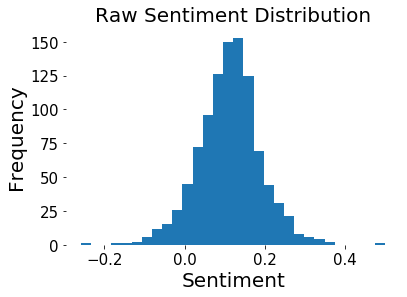

In [911]:
# Compound sentiment distribution
plt.hist(df_daily['final_sentiment'],bins=30)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False) 
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Raw Sentiment Distribution')

In [867]:
thresholds,raw_senti,senti_change_daily,senti_change_weekly,senti_change_2wk,senti_change_monthly = best_threshold(0,0.4,0.001,date(2015, 9, 1),date(2018, 3, 20))


100%|██████████| 400/400 [00:15<00:00, 21.32it/s]


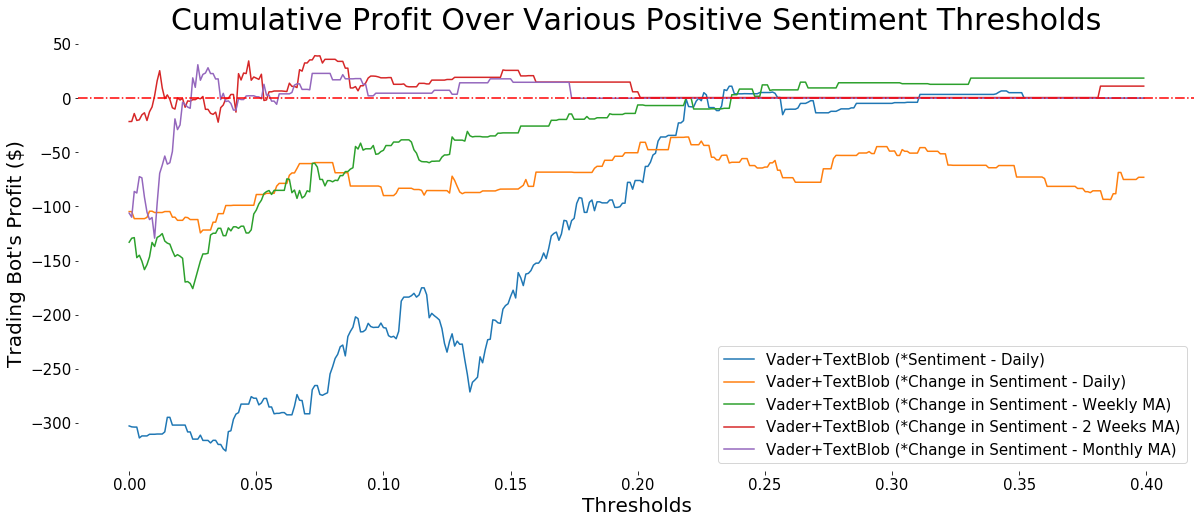

In [919]:
model_list = [raw_senti,senti_change_daily,senti_change_weekly,senti_change_2wk,senti_change_monthly]
threshold_vs_profit(thresholds,model_list)

In [872]:
print("Raw : ",thresholds[np.argmax(raw_senti)] )
print("Daily : ",thresholds[np.argmax(senti_change_daily)] )
print("Weekly : ",thresholds[np.argmax(senti_change_weekly)] )
print("Bieekly : ",thresholds[np.argmax(senti_change_2wk)] )
print("Monthly : ",thresholds[np.argmax(senti_change_monthly)] )

Raw :  0.23600000000000002
Daily :  0.219
Weekly :  0.331
Bieekly :  0.073
Monthly :  0.027


# Bitcoin Price Prediction/Recommendation

#### Graph Function for NN

In [882]:
   
def best_threshold2(min_threshold,max_threshold,step,min_date,max_date):
    
    # Add all final profit later on to these empty lists
    thresholds,senti_change_weekly,senti_change_2wk,senti_change_monthly = [],[],[],[]
    threshold_list = np.arange(min_threshold,max_threshold,step)
    for i in range(len(threshold_list)):
        positive_sentiment_threshold = threshold_list[i]

        # Generate DataFrame for daily sentiment for each publisher
        sentiment_by_publisher = df_news_sentiment.groupby(by=['date'],as_index=False).mean()

        # Mask to limit daterange for searching best threshhold
        #mask = ((sentiment_by_publisher['date']>min_date)&(sentiment_by_publisher['date']<max_date))
        mask = (sentiment_by_publisher['date']<min_date)
        sentiment_publisher_1 = sentiment_by_publisher.merge(df_daily[['date','wkly_sentiment_change','2wk_sentiment_change','4wk_sentiment_change','target_daily']], left_on='date', right_on='date')

        sentiment_publisher_1['compound_change_buy_sell_wkly'] = sentiment_publisher_1['wkly_sentiment_change'].apply(lambda x: 1 if x>positive_sentiment_threshold else 0).copy()
        sentiment_publisher_1['compound_change_profit_wkly'] = (sentiment_publisher_1['compound_change_buy_sell_wkly']*100*sentiment_publisher_1['target_daily']).copy()

        sentiment_publisher_1['compound_change_buy_sell_2wk'] = sentiment_publisher_1['2wk_sentiment_change'].apply(lambda x: 1 if x>positive_sentiment_threshold else 0).copy()
        sentiment_publisher_1['compound_change_profit_2wk'] = (sentiment_publisher_1['compound_change_buy_sell_2wk']*100*sentiment_publisher_1['target_daily']).copy()

        sentiment_publisher_1['compound_change_buy_sell_4wk'] = sentiment_publisher_1['4wk_sentiment_change'].apply(lambda x: 1 if x>positive_sentiment_threshold else 0).copy()
        sentiment_publisher_1['compound_change_profit_monthly'] = (sentiment_publisher_1['compound_change_buy_sell_4wk']*100*sentiment_publisher_1['target_daily']).copy()

        # Drop NAs
        sentiment_publisher_1.dropna(inplace=True)

        # Get Cumulative Profits
        compound_change_profit_wkly = list(sentiment_publisher_1['compound_change_profit_wkly'])
        compound_change_profit_2wk = list(sentiment_publisher_1['compound_change_profit_2wk'])
        compound_change_profit_montly = list(sentiment_publisher_1['compound_change_profit_monthly'])

        for i in range(1,len(compound_change_profit_wkly)):
            compound_change_profit_wkly[i] = compound_change_profit_wkly[i]+compound_change_profit_wkly[i-1]            
        for i in range(1,len(compound_change_profit_2wk)):
            compound_change_profit_2wk[i] = compound_change_profit_2wk[i]+compound_change_profit_2wk[i-1]  
        for i in range(1,len(compound_change_profit_montly)):
            compound_change_profit_montly[i] = compound_change_profit_montly[i]+compound_change_profit_montly[i-1] 

        thresholds.append(positive_sentiment_threshold)
        senti_change_weekly.append(compound_change_profit_wkly[-1])
        senti_change_2wk.append(compound_change_profit_2wk[-1])
        senti_change_monthly.append(compound_change_profit_montly[-1])
    return thresholds,senti_change_weekly,senti_change_2wk,senti_change_monthly

In [955]:
# Get profit based on model's predictions. Punish it if it predicted to buy but actually it was a loss. Else, no action = profit = 0.
def model_profit_graph(model_output,min_date,max_date):
    # Get Cumulative Profit for Generic Models       
    thresholds,senti_change_weekly,senti_change_2wk,senti_change_monthly = best_threshold2(0,0.3,0.002,min_date,max_date)
    best_threshold_weekly = thresholds[np.argmax(senti_change_weekly)]
    best_threshold_biweekly = thresholds[np.argmax(senti_change_2wk)]
    best_threshold_monthly = thresholds[np.argmax(senti_change_monthly)]
    

    asdf_df = df_news_sentiment[df_news_sentiment['date']>max_date]
    sentiment_by_publisher = asdf_df.groupby(by=['date'],as_index=False).mean()
    sentiment_publisher_1 = sentiment_by_publisher.merge(df_daily[['date','wkly_sentiment_change','2wk_sentiment_change','4wk_sentiment_change','target_daily']], left_on='date', right_on='date')
    sentiment_publisher_1['weekly_buy_sell'] = sentiment_publisher_1['wkly_sentiment_change'].apply(lambda x: 1 if x>best_threshold_weekly else 0).copy()
    sentiment_publisher_1['weekly_profit'] = (sentiment_publisher_1['weekly_buy_sell']*100*sentiment_publisher_1['target_daily']).copy()
    sentiment_publisher_1['biweekly_buy_sell'] = sentiment_publisher_1['2wk_sentiment_change'].apply(lambda x: 1 if x>best_threshold_biweekly else 0).copy()
    sentiment_publisher_1['biweekly_profit'] = (sentiment_publisher_1['biweekly_buy_sell']*100*sentiment_publisher_1['target_daily']).copy()
    sentiment_publisher_1['monthly_buy_sell'] = sentiment_publisher_1['4wk_sentiment_change'].apply(lambda x: 1 if x>best_threshold_monthly else 0).copy()
    sentiment_publisher_1['monthly_profit'] = (sentiment_publisher_1['monthly_buy_sell']*100*sentiment_publisher_1['target_daily']).copy()
    sentiment_publisher_1.dropna(inplace=True)
        
    weekly_profit = list(sentiment_publisher_1['weekly_profit'])
    for i in range(1,len(weekly_profit)):
        weekly_profit[i] = weekly_profit[i]+weekly_profit[i-1]        
    biweekly_profit = list(sentiment_publisher_1['biweekly_profit'])
    for i in range(1,len(biweekly_profit)):
        biweekly_profit[i] = biweekly_profit[i]+biweekly_profit[i-1]        
    monthly_profit = list(sentiment_publisher_1['monthly_profit'])
    for i in range(1,len(monthly_profit)):
        monthly_profit[i] = monthly_profit[i]+monthly_profit[i-1]
        
    # Get Cumulative Profit for LightGBM
    df_test['pred'] = model_output   
    pred_profit = []
    for i in range(len(df_test['pred'])):
        if (df_test['pred'].iloc[i]>0):
            pred_profit.append(df_test['target_daily'].iloc[i]*100)
        else:
            pred_profit.append(0)            
            
    # Get ideal profit for the same day if you bought $100 worth of bitcoin in one day and sold it exactly day after
    df_test['target_daily_profit'] = df_test['target_daily'].apply(lambda x: 100*x if x>0 else 0)  
    # Gain cumulative profit
    target_profit = list(df_test['target_daily_profit'])
    for i in range(1,len(target_profit)):
        target_profit[i] = (target_profit[i]+target_profit[i-1])
        pred_profit[i] = (pred_profit[i]+pred_profit[i-1])
    print("Profit : ${}".format(pred_profit[-1]))
    
    # Plot cumulative profit
    plt.figure(figsize=(20,8))
    sns.lineplot(x=df_test['date'],y=target_profit)
    sns.lineplot(x=df_test['date'],y=pred_profit)
    sns.lineplot(x=sentiment_publisher_1['date'],y=weekly_profit)
    sns.lineplot(x=sentiment_publisher_1['date'],y=biweekly_profit)
    sns.lineplot(x=sentiment_publisher_1['date'],y=monthly_profit)
   
    plt.axhline(y=0,color='r',linestyle ='-.' )  #vertical line. Linestype : ['-', '--', '-.', ':', '',]
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.xlabel('Date')
    plt.ylabel("Profit ($)")
    plt.title('Cumulative Profit')
    plt.legend(['Actual','Trading Bot','Weekly Sentiment MA','Bi-weekly Sentiment MA','Monthly Sentiment MA'])
    #plt.grid()
    plt.show()

#### Simple NN

##### View Heatmap of Features to Target

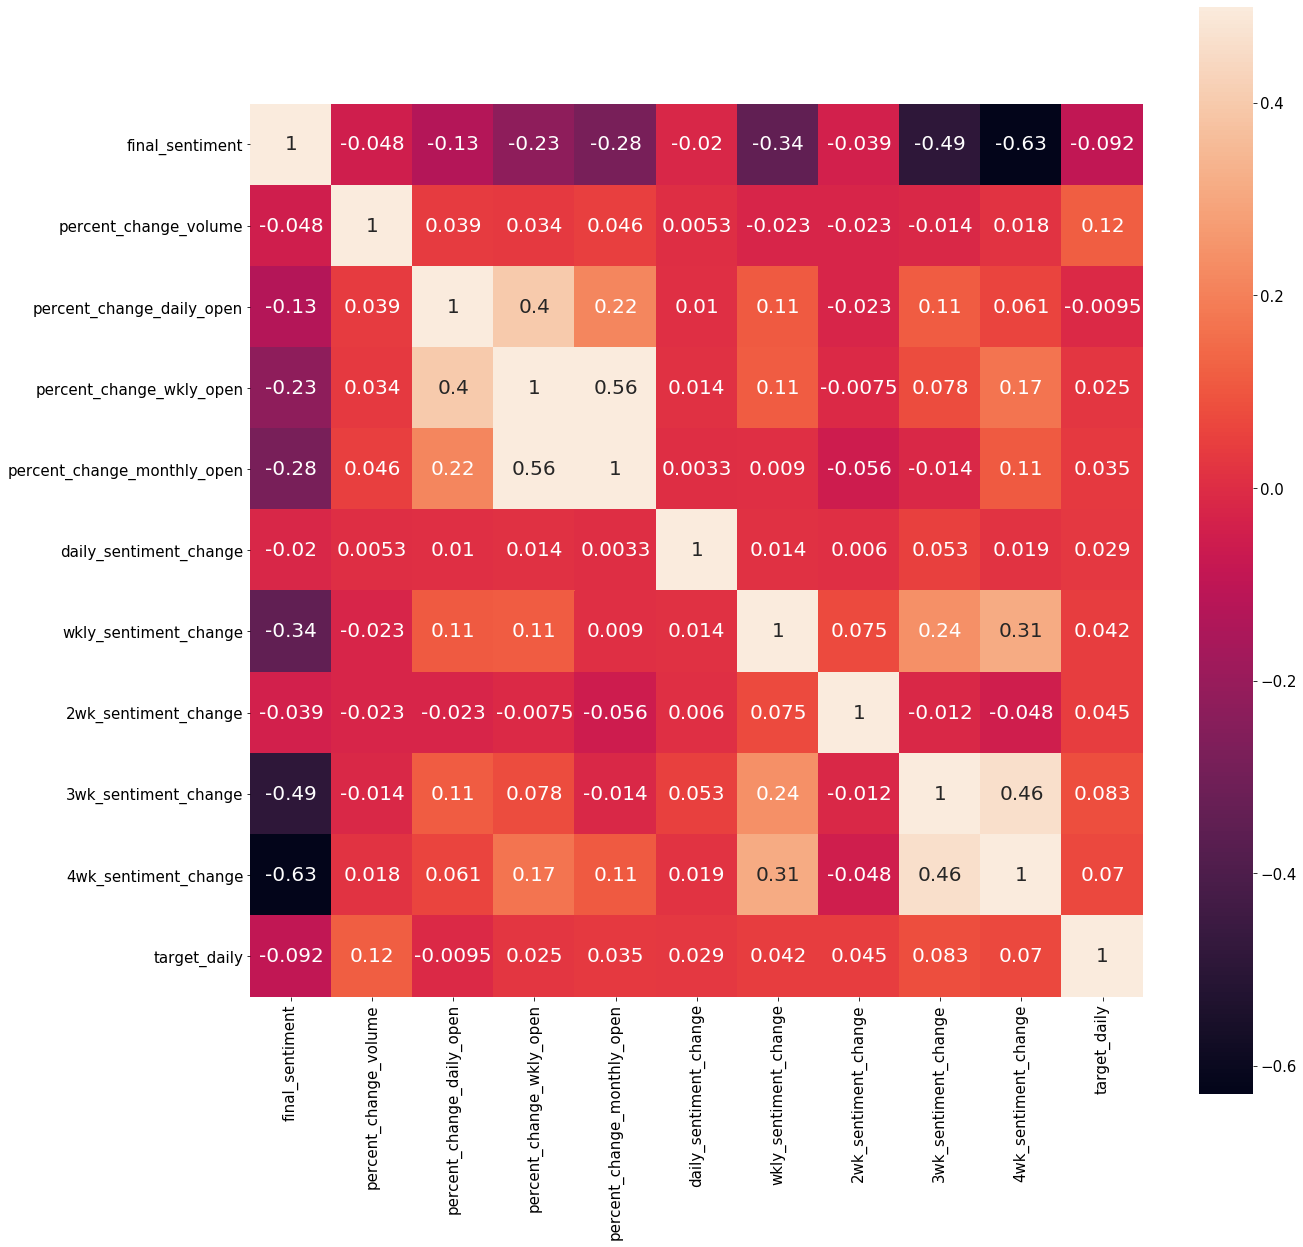

In [190]:
# # Drop unneeded columns
# df_daily.drop(columns=['neg', 'neu', 'pos', 'compound', 'txtblob','high','low','market_cap','open', 'close', 'volume','percent_change_daily_close', 'percent_change_wkly_close'],inplace=True)

# View Hitmap
C_mat = df_daily.corr()
fig = plt.figure(figsize=(20,20))
sns.heatmap(C_mat,vmax=0.5,square=True,annot=True)
plt.show()

##### Add LDA Topic Probability Featurs

In [929]:
from gensim.corpora import Dictionary
dic = Dictionary([df_news_clean['title_intro_clean']])
vec_bows=[]
for ix,item in enumerate(corpus):
    vec_bows.append(item)

vec_lda_topics=[lda[vec_bow] for vec_bow in vec_bows]

lda_vector = []
for id,vec_lda_topic in enumerate(vec_lda_topics):
    lda_vector.append(vec_lda_topic)
    
num_topic = 13
lda_topic_vectors = []
for vector in lda_vector:
    empty_dict = {x:0 for x in range(num_topic)}
    for topic in vector:            
        empty_dict[topic[0]]=topic[1]
    lda_topic_vectors.append(list(empty_dict.values()))
    
# Create DF of lda topic vectors and turn it groupby date
df_lda = pd.DataFrame(lda_topic_vectors)
df_lda['date'] = df_news_sentiment['date']
df_lda_daily = df_lda.groupby(by=['date'],as_index=False,).mean()

# Merge lda vector to main dataframe
df_daily = df_daily.merge(df_lda_daily, left_on='date', right_on='date')

##### Split Data & Apply StandardScaler

In [948]:
min_date = date(2017,6,1)
max_date = date(2019,7,1)

mask_train = ((df_daily['date']>min_date) & (df_daily['date']<(max_date- timedelta(days=2))))
mask_test = (df_daily['date'] > max_date) 

features = ['percent_change_volume'
            ,'percent_change_daily_open'
#            ,'percent_change_wkly_open'
            #,'percent_change_monthly_open'
            ,'daily_sentiment_change'
#            ,'wkly_sentiment_change'
            #,'2wk_sentiment_change'
            #,'4wk_sentiment_change'
#             ,0
#             ,1
#             ,2
#             ,3
#             ,4
#             ,5
#             ,6
#             ,7
#             ,8
#             ,9
#             ,'10_y'
#             ,'11_y'
#             ,'12_y'
           ]
target = ['target_daily']

df_train = df_daily[mask_train].dropna().copy() 
df_test =  df_daily[mask_test].dropna().copy()

X_train = df_train[features]
y_train = df_train[target]

X_test = df_test[features]
y_test = df_test[target]


# Split train into train & val for NN training. shuffle=False so that it doesn't look into the future
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.1,shuffle=False)

# Perform Scaling on Train Data and Apply to Val and Test Set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
print("Holdout set percentage : {} %".format(len(X_test)/(len(X_train)+len(X_val)+len(X_test))*100))

Holdout set percentage : 5.137844611528822 %


##### Define and Train NN

In [949]:
# Model
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,Input
from keras.optimizers import Adam

# Initialize Model
nn = Sequential()
# Input layer & hidden layer
nn.add(Dense(3, input_shape=(X_train.shape[1],), activation='relu'))
#nn.add(Dropout(0.5))
# nn.add(Dense(4,activation='relu'))
# nn.add(Dropout(0.2))
# Output layer
nn.add(Dense(1))
# Compile the architecture and view summary
optimizer = Adam(lr=0.01)
nn.compile(optimizer=optimizer, loss='mean_squared_error')
#nn.summary()

from keras.callbacks import ModelCheckpoint,EarlyStopping

# Early Stopping for the nn
early_stopping = EarlyStopping(monitor='val_loss', patience=4, verbose=1, mode='auto',restore_best_weights=True)
callbacks_list = [early_stopping]

# Train the model
nn.fit(x=X_train,y=y_train.values, epochs=70,shuffle=True,
          validation_data=(X_val, y_val.values),callbacks=callbacks_list)# validation_split=0.2)#) #, callbacks=callbacks_list)
model_pred = nn.predict(X_test)

# # Save Trained Model
# with open('nn.pkl', 'wb') as picklefile:
#     pickle.dump(nn, picklefile)    


Train on 681 samples, validate on 76 samples
Epoch 1/70
681/681 [==============================] - 5s 7ms/step - loss: 0.2517 - val_loss: 1.0551
Epoch 2/70
681/681 [==============================] - 0s 170us/step - loss: 0.0660 - val_loss: 0.6011
Epoch 3/70
681/681 [==============================] - 0s 187us/step - loss: 0.0333 - val_loss: 0.3740
Epoch 4/70
681/681 [==============================] - 0s 207us/step - loss: 0.0181 - val_loss: 0.2803
Epoch 5/70
681/681 [==============================] - 0s 196us/step - loss: 0.0117 - val_loss: 0.1902
Epoch 6/70
681/681 [==============================] - 0s 194us/step - loss: 0.0075 - val_loss: 0.1451
Epoch 7/70
681/681 [==============================] - 0s 192us/step - loss: 0.0055 - val_loss: 0.1119
Epoch 8/70
681/681 [==============================] - 0s 203us/step - loss: 0.0040 - val_loss: 0.0718
Epoch 9/70
681/681 [==============================] - 0s 198us/step - loss: 0.0033 - val_loss: 0.0537
Epoch 10/70
681/681 [==================

In [953]:
 

# Save Trained Model
with open('nn.pkl', 'rb') as picklefile:
    nn=pickle.load( picklefile)  
model_pred = nn.predict(X_test)

Profit : $20.809261162270108


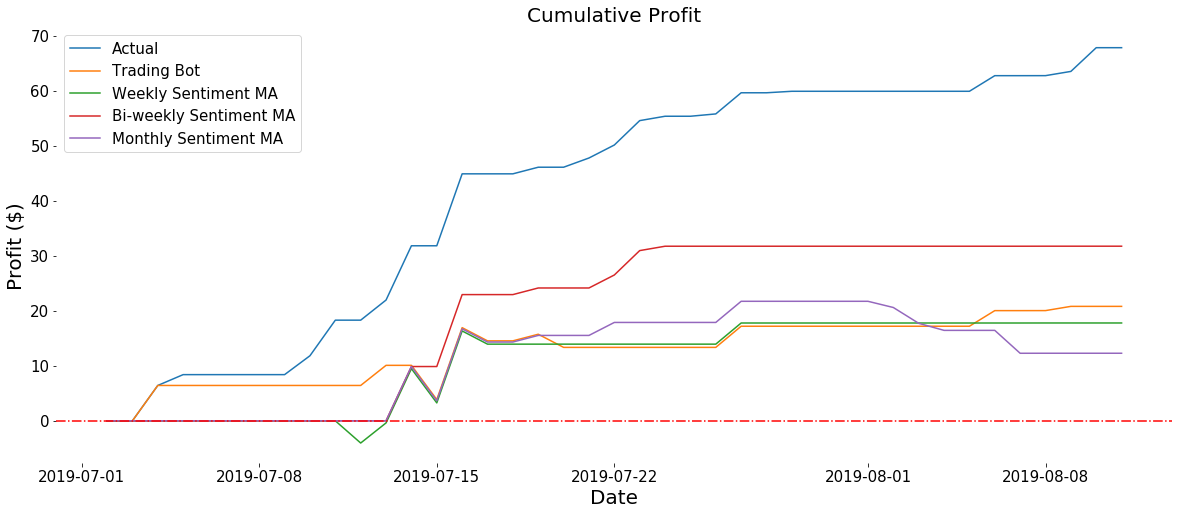

In [956]:
# Predict from July, Shuffle=True since i'm using only daily data.
model_profit_graph(model_pred,min_date,max_date)

Profit : $20.809261162270108


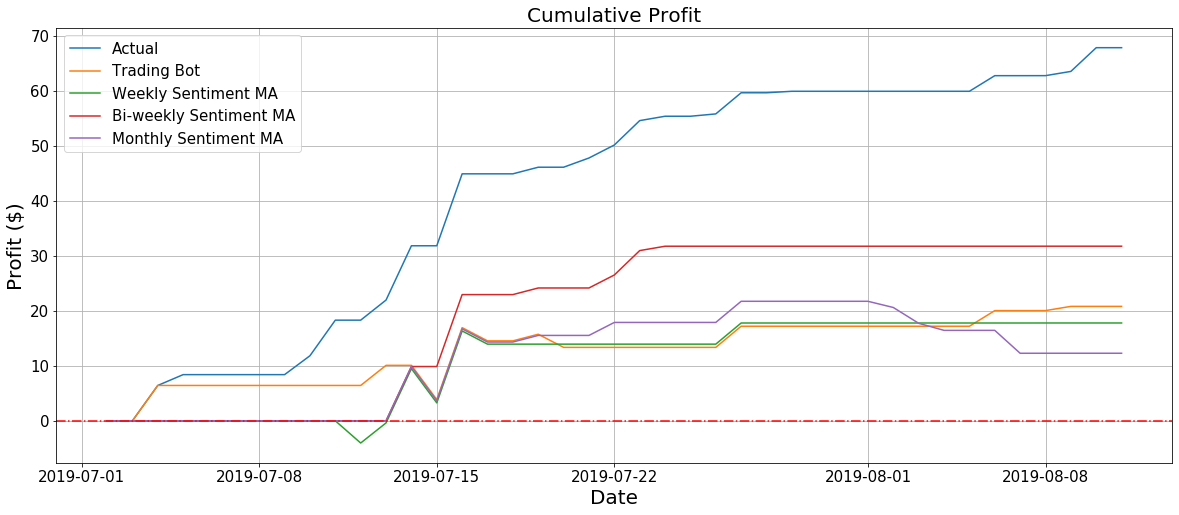

In [883]:
# Predict from July, Shuffle=True since i'm using only daily data.
model_profit_graph(model_pred,min_date,max_date)

#### LSTM

In [977]:
from keras.layers import LSTM, Dropout, Dense, TimeDistributed, BatchNormalization, Activation, Bidirectional
from keras.models import Sequential
import tensorflow as tf

In [1114]:
min_date = date(2017,6,1)
val_date = date(2019,4,1)
max_date = date(2019,7,1)


mask_train = ((df_daily['date']>min_date) & (df_daily['date']<val_date))
mask_val = ((df_daily['date']>val_date) & (df_daily['date']<max_date))
mask_test = (df_daily['date'] > max_date) 

features = ['percent_change_volume'
            ,'percent_change_daily_open'
#            ,'percent_change_wkly_open'
            #,'percent_change_monthly_open'
            ,'daily_sentiment_change'
#            ,'wkly_sentiment_change'
            #,'2wk_sentiment_change'
            #,'4wk_sentiment_change'
            ,'open'
            ,'volume'
            ,0
            ,1
            ,2
            ,3
            ,4
            ,5
            ,6
            ,7
            ,8
            ,9
            ,10
            ,11
            ,12
           ]
target = ['target_daily']



df_train = df_daily[mask_train].dropna().copy()
df_val = df_daily[mask_val].dropna().copy()
df_test =  df_daily[mask_test].dropna().copy()

# Perform Scaling on Train Data and Apply to Val and Test Set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(df_train[features]).T
X_val = scaler.transform(df_val[features]).T
X_test = scaler.transform(df_test[features]).T

#X_train = df_train[features].T
y_train = np.array(df_train[target])
y_train = y_train.reshape(-1,y_train.shape[1])

#X_val = df_val[features].T
y_val = np.array(df_val[target])
y_val = y_val.reshape(-1,y_val.shape[1])

#X_test = df_test[features].T
y_test = np.array(df_test[target])
y_test = y_test.reshape(-1,y_test.shape[1])

# # Split train into train & val for NN training. shuffle=False so that it doesn't look into the future
# from sklearn.model_selection import train_test_split
# X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.15,shuffle=False)


print("Holdout set percentage : {} %".format(len(df_test)/(len(df_train)+len(df_val)+len(df_test))*100))

Holdout set percentage : 5.131414267834793 %


In [1115]:
X_train = X_train.reshape(1,X_train.shape[1],X_train.shape[0])
X_val = X_val.reshape(1,X_val.shape[1],X_val.shape[0])
X_test = X_test.reshape(1,X_test.shape[1],X_test.shape[0])

In [1116]:
model = Sequential()

# Define LSTM Model
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.summary()

model.compile(loss='mean_squared_error', optimizer='adam')
# callbacks = [EarlyStopping(monitor='val_mean_squared_error', patience=20),
#             ModelCheckpoint(filepath='best_model.h5', monitor='val_mean_squared_error', save_best_only=True,mode='max')]
# model.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=200, batch_size=128, verbose=1,callbacks=callbacks)
model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=1)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 128)               75264     
_________________________________________________________________
dropout_134 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_304 (Dense)            (None, 16)                2064      
_________________________________________________________________
dropout_135 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_305 (Dense)            (None, 1)                 17        
Total params: 77,345
Trainable params: 77,345
Non-trainable params: 0
_________________________________________________________________


ValueError: Input arrays should have the same number of samples as target arrays. Found 1 input samples and 668 target samples.

In [1061]:
y_train.shape



(1, 668)